<a href="https://www.kaggle.com/code/abdelrahmanzakzouk/pl-2016-2023-milestone1-zak-3cec15?scriptVersionId=270612205" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


1. does duplicate gameweeks values need to be removed or are they double gameweeksfor gameweeks less than 4. the form will be current gameweeks / 10 or how will it be calculated.
2. the largest sum of total points on average per position. per season or for all season.
3. 2B - how to find the highest form. is it the average or what


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from keras import Sequential, Input 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.metrics import Precision, Recall 

2025-10-24 19:36:15.733684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761334575.907189      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761334575.950608      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# the main dataset

df = pd.read_csv('/kaggle/input/fantasy-football/cleaned_merged_seasons.csv')  
df.head() # This shows you the first 5 rows of the table!

/tmp/ipykernel_19/4160622717.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/fantasy-football/cleaned_merged_seasons.csv')


season_x                name position team_x  assists  bonus  bps  \
0  2016-17     Aaron Cresswell      DEF    NaN        0      0    0   
1  2016-17        Aaron Lennon      MID    NaN        0      0    6   
2  2016-17        Aaron Ramsey      MID    NaN        0      0    5   
3  2016-17  Abdoulaye Doucouré      MID    NaN        0      0    0   
4  2016-17        Adam Forshaw      MID    NaN        0      0    3   

   clean_sheets  creativity  element  ...  team_h_score  threat  total_points  \
0             0         0.0      454  ...           2.0     0.0             0   
1             0         0.3      142  ...           1.0     0.0             1   
2             0         4.9       16  ...           3.0    23.0             2   
3             0         0.0      482  ...           1.0     0.0             0   
4             0         1.3      286  ...           1.0     0.0             1   

   transfers_balance  transfers_in transfers_out  value  was_home  \
0                  0             0             0     55     False   
1                  0             0             0     60      True   
2                  0             0             0     80      True   
3                  0             0             0     50     False   
4                  0             0             0     45      True   

  yellow_cards  GW  
0            0   1  
1            0   1  
2            0   1  
3            0   1  
4            1   1  

[5 rows x 37 columns]

In [3]:
df['position'].unique()
df[df['position'] == "GKP"]

season_x               name position     team_x  assists  bonus  bps  \
68045  2021-22         Bernd Leno      GKP    Arsenal        0      0    0   
68072  2021-22          Nick Pope      GKP    Burnley        0      0   20   
68073  2021-22          Nick Pope      GKP    Burnley        0      1   26   
68076  2021-22        Will Norris      GKP    Burnley        0      0    0   
68077  2021-22        Will Norris      GKP    Burnley        0      0    0   
...        ...                ...      ...        ...      ...    ...  ...   
68861  2021-22         Sam Waller      GKP    Burnley        0      0    0   
68862  2021-22         Sam Waller      GKP    Burnley        0      0    0   
68904  2021-22  David Raya Martin      GKP  Brentford        0      0   18   
68917  2021-22    Ellery Balcombe      GKP  Brentford        0      0    0   
68919  2021-22  Patrik Gunnarsson      GKP  Brentford        0      0    0   

       clean_sheets  creativity  element  ...  team_h_score  threat  \
68045             0         0.0        1  ...           2.0     0.0   
68072             0         0.0      112  ...           1.0     0.0   
68073             0         0.0      112  ...           1.0     0.0   
68076             0         0.0      114  ...           1.0     0.0   
68077             0         0.0      114  ...           1.0     0.0   
...             ...         ...      ...  ...           ...     ...   
68861             0         0.0      708  ...           1.0     0.0   
68862             0         0.0      708  ...           1.0     0.0   
68904             0         0.0       80  ...           2.0     0.0   
68917             0         0.0       92  ...           2.0     0.0   
68919             0         0.0       94  ...           2.0     0.0   

       total_points  transfers_balance  transfers_in transfers_out  value  \
68045             0               -422           216           638     45   
68072             3               -235         10433         10668     53   
68073             5               -235         10433         10668     53   
68076             0                -10            76            86     43   
68077             0                -10            76            86     43   
...             ...                ...           ...           ...    ...   
68861             0                347           513           166     40   
68862             0                347           513           166     40   
68904             2               8656         16108          7452     43   
68917             0                 -3             0             3     40   
68919             0              -1561             0          1561     39   

       was_home yellow_cards  GW  
68045     False            0  37  
68072     False            1  37  
68073     False            0  37  
68076     False            0  37  
68077     False            0  37  
...         ...          ...  ..  
68861     False            0  37  
68862     False            0  37  
68904     False            0  37  
68917     False            0  37  
68919     False            0  37  

[101 rows x 37 columns]

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [5]:
df.describe()

assists         bonus           bps  clean_sheets    creativity  \
count  96169.000000  96169.000000  96169.000000  96169.000000  96169.000000   
mean       0.041042      0.108715      6.080275      0.106739      4.734000   
std        0.215378      0.492334      9.850595      0.308783     10.689879   
min        0.000000      0.000000    -21.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000     10.000000      0.000000      2.400000   
max        4.000000      3.000000    128.000000      1.000000    170.900000   

            element       fixture  goals_conceded  goals_scored     ict_index  \
count  96169.000000  96169.000000    96169.000000  96169.000000  96169.000000   
mean     327.063264    198.413824        0.495887      0.045514      1.715793   
std      194.313766    108.884200        0.974269      0.233644      3.042551   
min        1.000000      1.000000        0.000000      0.000000      0.000000   
25%      159.000000    105.000000        0.000000      0.000000      0.000000   
50%      318.000000    203.000000        0.000000      0.000000      0.000000   
75%      486.000000    293.000000        1.000000      0.000000      2.500000   
max      778.000000    380.000000        9.000000      4.000000     32.800000   

       ...  team_a_score  team_h_score        threat  total_points  \
count  ...  96169.000000  96169.000000  96169.000000  96169.000000   
mean   ...      1.265158      1.516393      5.287598      1.379270   
std    ...      1.229086      1.349184     13.368420      2.542535   
min    ...      0.000000      0.000000      0.000000     -7.000000   
25%    ...      0.000000      1.000000      0.000000      0.000000   
50%    ...      1.000000      1.000000      0.000000      0.000000   
75%    ...      2.000000      2.000000      2.000000      2.000000   
max    ...      7.000000      9.000000    186.000000     29.000000   

       transfers_balance  transfers_in  transfers_out         value  \
count       9.616900e+04  9.616900e+04   9.616900e+04  96169.000000   
mean        1.677100e+03  1.454716e+04   1.286945e+04     51.352390   
std         6.581628e+04  5.725343e+04   4.840128e+04     12.667432   
min        -2.180978e+06  0.000000e+00   0.000000e+00     37.000000   
25%        -1.374000e+03  4.600000e+01   1.280000e+02     44.000000   
50%        -5.800000e+01  4.380000e+02   1.104000e+03     48.000000   
75%         7.900000e+01  5.042000e+03   7.562000e+03     54.000000   
max         1.983733e+06  2.104464e+06   2.233619e+06    133.000000   

       yellow_cards            GW  
count  96169.000000  96169.000000  
mean       0.053167     20.772099  
std        0.224367     10.941742  
min        0.000000      1.000000  
25%        0.000000     11.000000  
50%        0.000000     22.000000  
75%        0.000000     30.000000  
max        1.000000     38.000000  

[8 rows x 30 columns]

In [6]:
df.isnull().sum()

season_x                 0
name                     0
position                 0
team_x               19852
assists                  0
bonus                    0
bps                      0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

<Axes: >

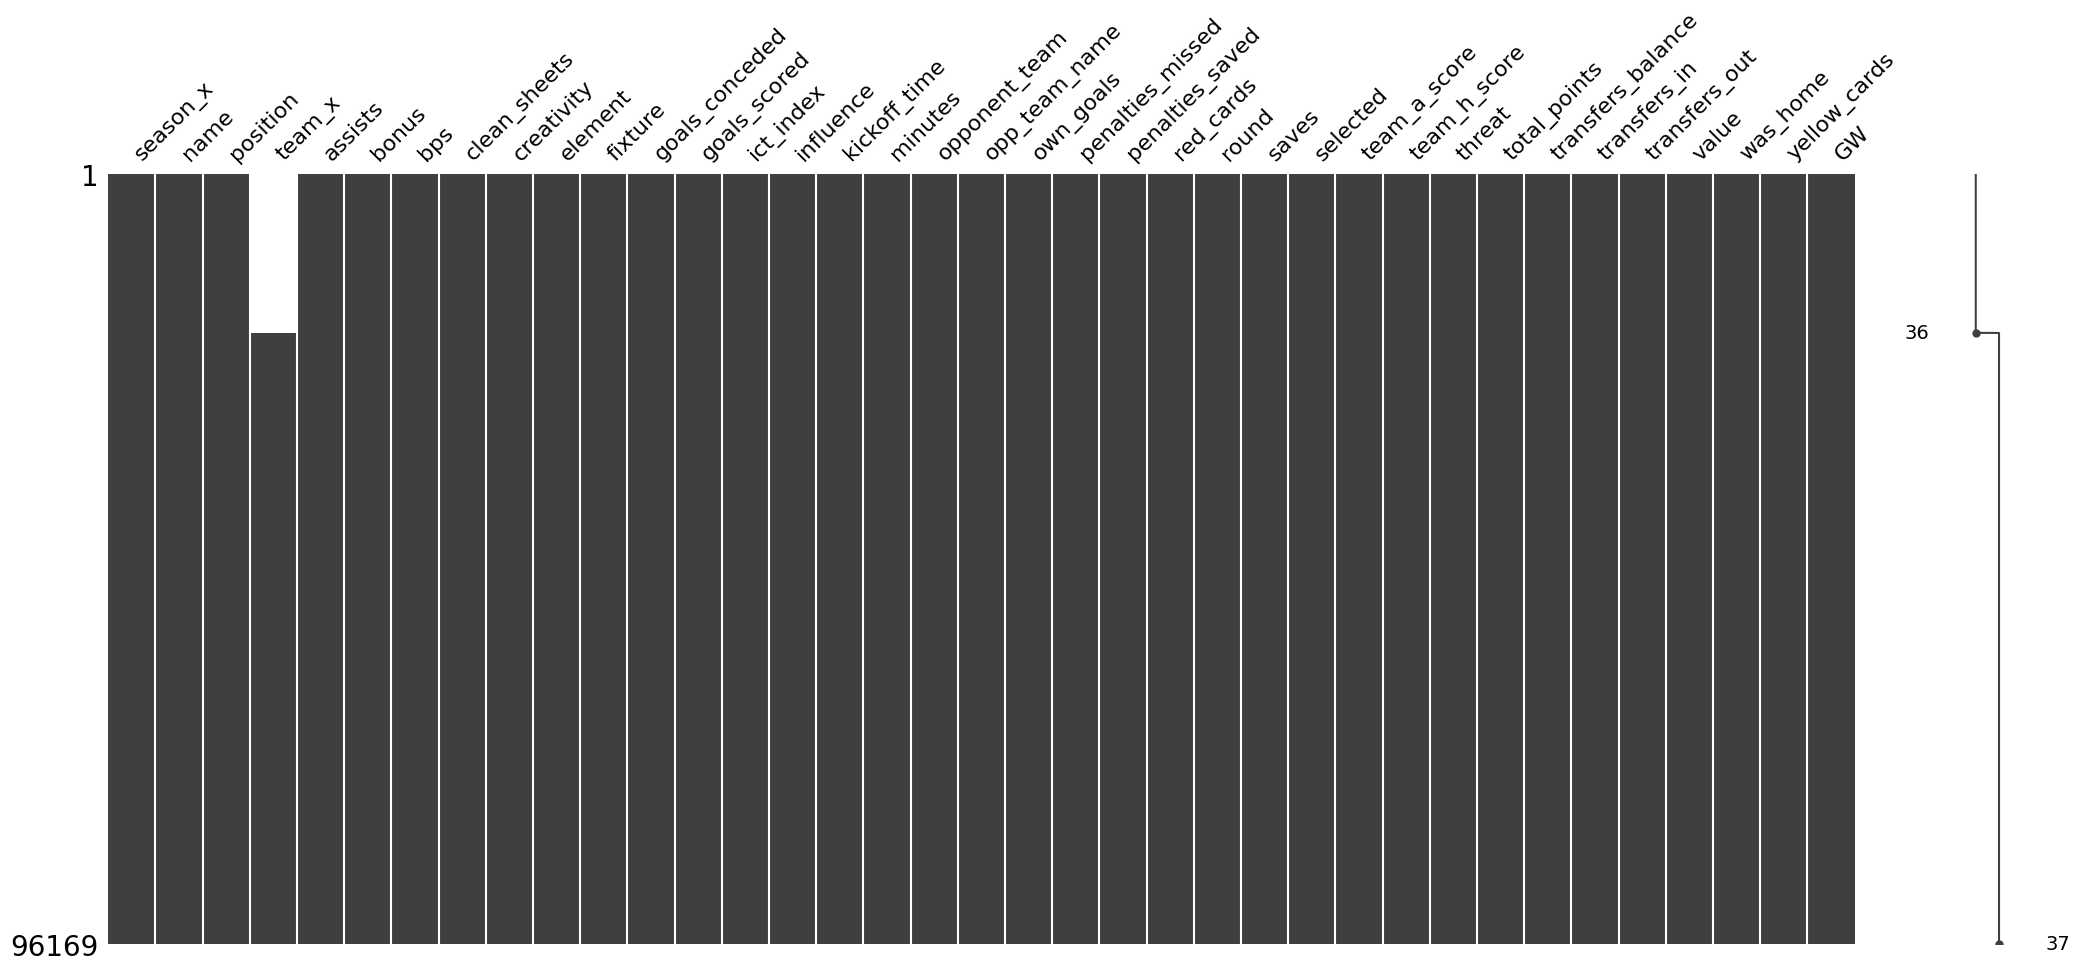

In [7]:
msno.matrix(df)

In [8]:
# listing the list of attributes in the dataset
df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

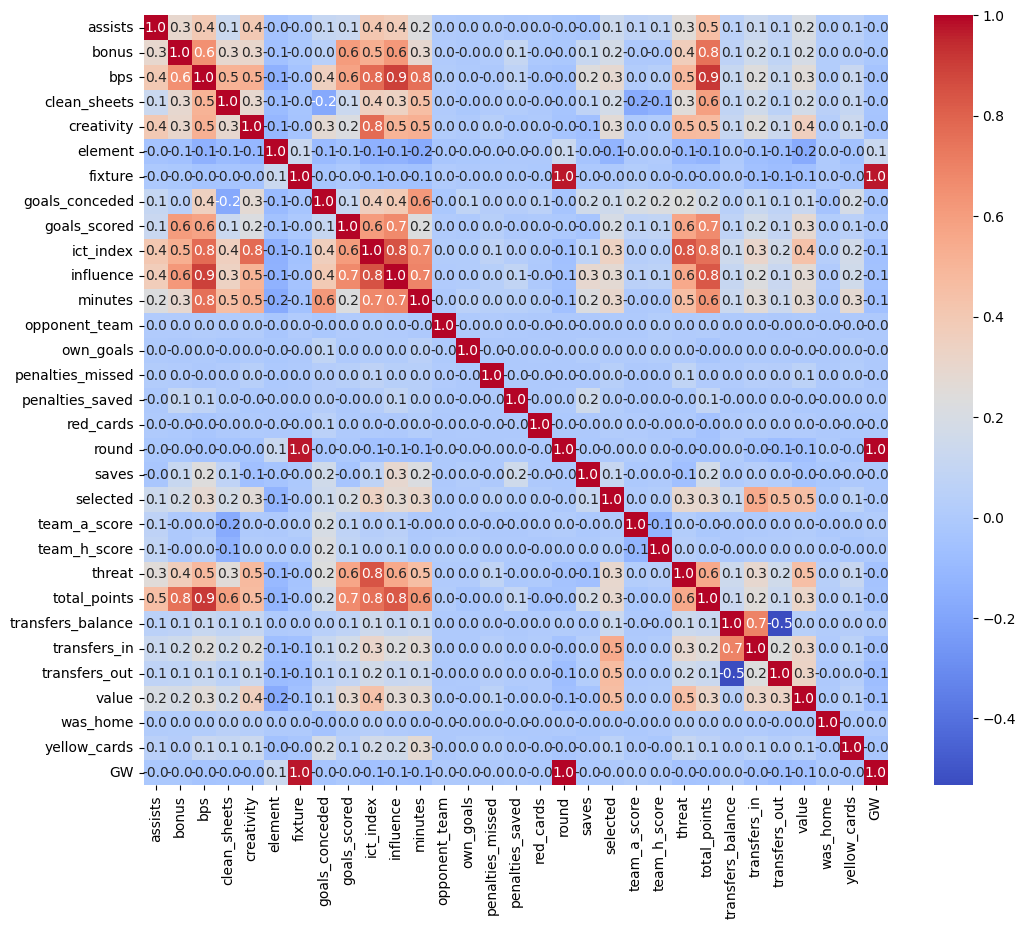

In [9]:
pivot = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))  # width=12, height=8 (adjust as you like)
sns.heatmap(pivot, annot=True, cmap="coolwarm",fmt=".1f")
plt.show()

**from the previous co-relation heat map matrix it can be shown that the attributes with most influence on the total points are: bps, bonus, influence, ict index, goals_scored, clean_sheets, minutes, threat, creativity, and assists.**

### Filling Null Values in team column

In [10]:
# Fill NaNs in "team_x" within each "name" group using nearest non-null values:
# - Forward fill (ffill) to use the previous value
# - Backward fill (bfill) for any remaining NaNs
df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_19/3244529142.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


<Axes: >

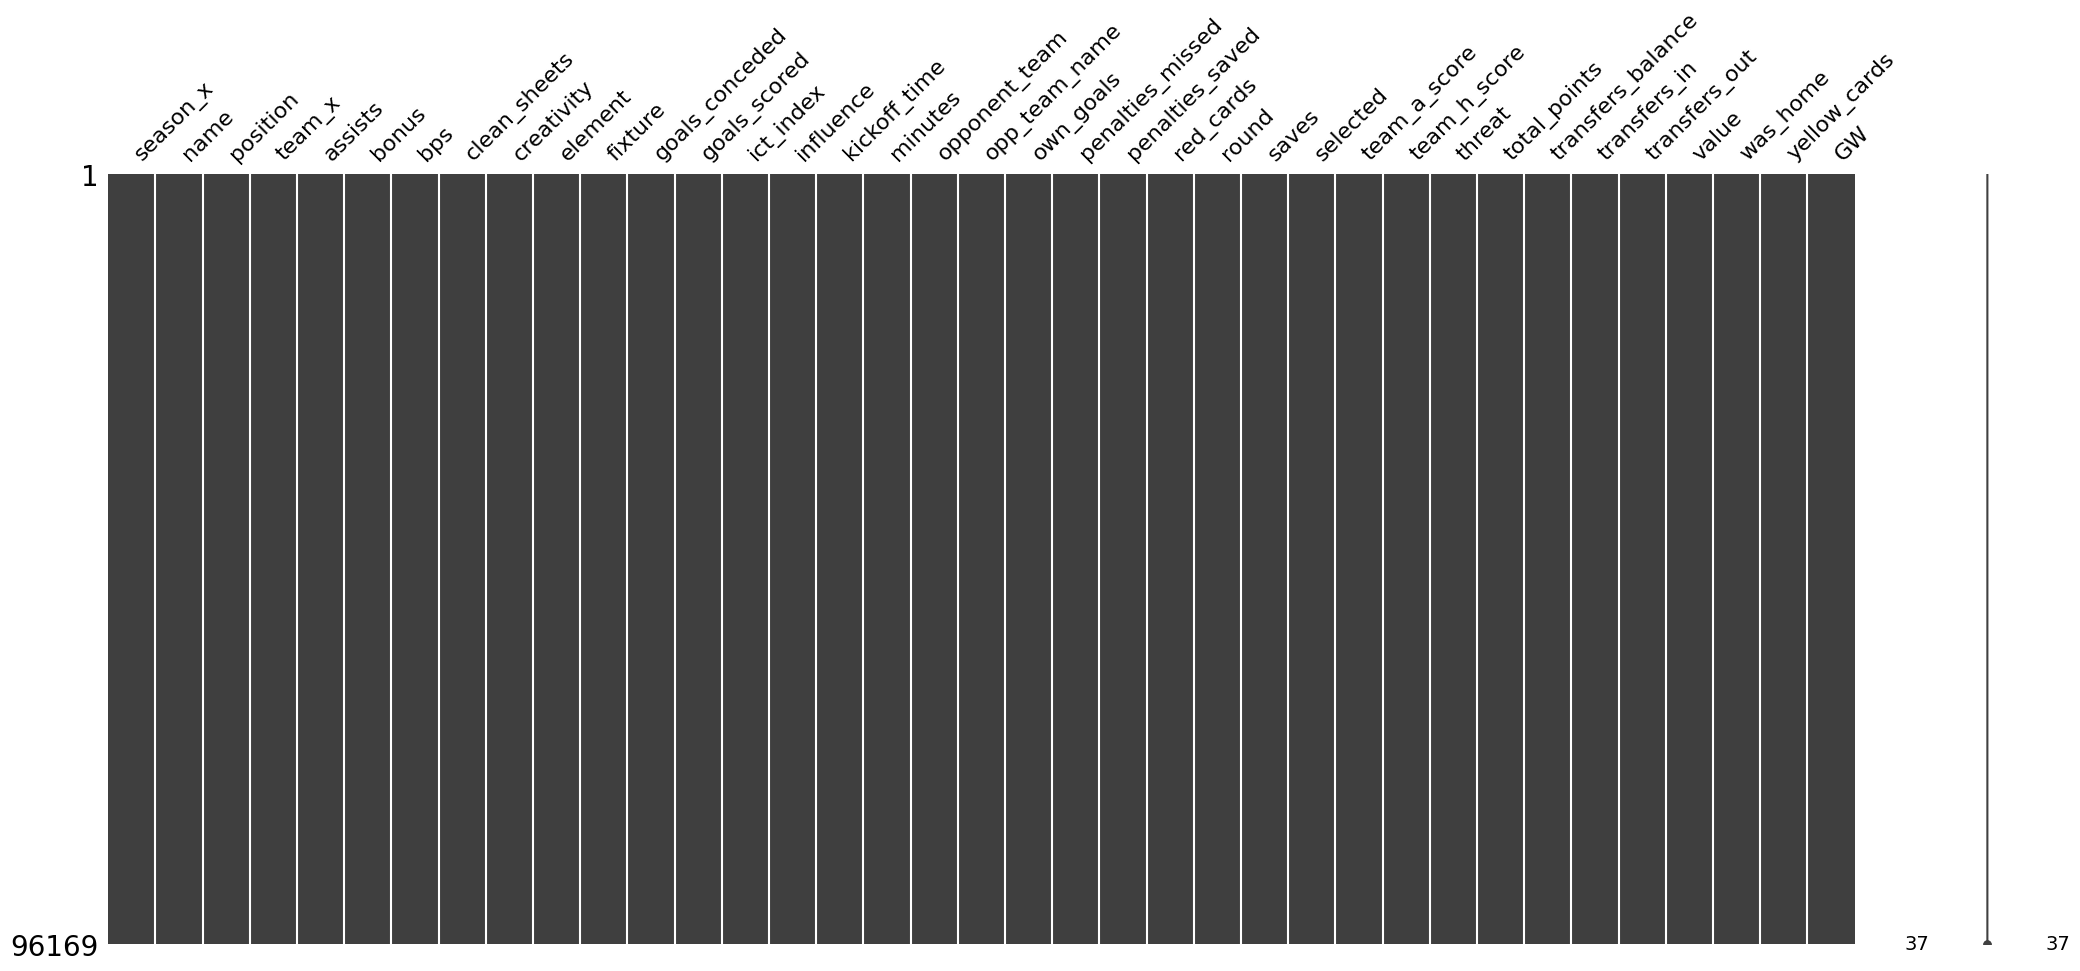

In [11]:
# checking if there is still nan values
msno.matrix(df)

### Chacking for Duplicates

In [12]:
# Check if entire rows are duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Show duplicate rows
duplicate_rows = df[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [13]:
# Check duplicates based on specific columns
duplicates = df.duplicated(subset=['name', 'season_x', 'GW', 'opponent_team', 'team_x'])
print(f"Duplicate players in same season: {duplicates.sum()}")

# Show these duplicates
duplicate_players = df[duplicates]
print(duplicate_players)

Duplicate players in same season: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [14]:
# finding duplicate cells

dupe_groups = (
    
    df.groupby(["name", "GW", "season_x"])
      .size()
      .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"] > 1]
print(dupe_groups)

                  name  GW season_x  count
41      Aaron Connolly  22  2021-22      2
46      Aaron Connolly  25  2021-22      2
54      Aaron Connolly  29  2021-22      2
61      Aaron Connolly  33  2021-22      2
161    Aaron Cresswell  19  2020-21      2
...                ...  ..      ...    ...
90212   Çaglar Söyüncü  36  2021-22      2
90215   Çaglar Söyüncü  37  2021-22      2
90235     Ørjan Nyland  19  2020-21      2
90242     Ørjan Nyland  26  2020-21      2
90251     Ørjan Nyland  35  2020-21      2

[5860 rows x 4 columns]


### These found duplicates tell that the player has played a postponed match during this game week leading to the found duplication.


### Create Form Column for Dataset

In [15]:
def calculate_form(df, window=4):
    """
    Calculates player form as the average of the previous 'window' gameweeks,
    excluding the current gameweek.
    """
    # Sort by player, season, and gameweek
    df_sorted = df.sort_values(['name', 'season_x', 'GW']).copy()
    
    # Initialize form column
    df_sorted['form'] = 0.0
    
    # Group by player and season
    for (player, season), group in df_sorted.groupby(['name', 'season_x']):
        indices = group.index
        
        # Iterate through each row (gameweek)
        for i, idx in enumerate(indices):
            # Take the previous window gameweeks only (exclude current)
            start_idx = max(0, i - window)
            end_idx = i  # exclude current
            
            # If no previous matches, form remains 0
            if start_idx == end_idx:
                df_sorted.loc[idx, 'form'] = 0.0
                continue
            
            # Calculate average of previous gameweeks
            past_points = group.iloc[start_idx:end_idx]['total_points']
            avg_points = past_points.mean()
            
            # Normalize by 10 as before
            df_sorted.loc[idx, 'form'] = avg_points / 10
    
    return df_sorted

# Apply the function
df = calculate_form(df)
df[['name', 'season_x', 'GW', 'total_points', 'form']].head(20)

name season_x  GW  total_points      form
19852  Aaron Connolly  2020-21   1             1  0.000000
20277  Aaron Connolly  2020-21   2             8  0.100000
20816  Aaron Connolly  2020-21   3             2  0.450000
21370  Aaron Connolly  2020-21   4             2  0.366667
21932  Aaron Connolly  2020-21   5             4  0.325000
22519  Aaron Connolly  2020-21   6             0  0.400000
23109  Aaron Connolly  2020-21   7             0  0.200000
23706  Aaron Connolly  2020-21   8             1  0.150000
24306  Aaron Connolly  2020-21   9             0  0.125000
24907  Aaron Connolly  2020-21  10             2  0.025000
25510  Aaron Connolly  2020-21  11             2  0.075000
26051  Aaron Connolly  2020-21  12             1  0.125000
26658  Aaron Connolly  2020-21  13             0  0.125000
27265  Aaron Connolly  2020-21  14             2  0.125000
27876  Aaron Connolly  2020-21  15             0  0.125000
28489  Aaron Connolly  2020-21  16             0  0.075000
28981  Aaron Connolly  2020-21  17             5  0.050000
29539  Aaron Connolly  2020-21  18             0  0.175000
29939  Aaron Connolly  2020-21  19             0  0.125000
30892  Aaron Connolly  2020-21  20             0  0.125000

<Axes: >

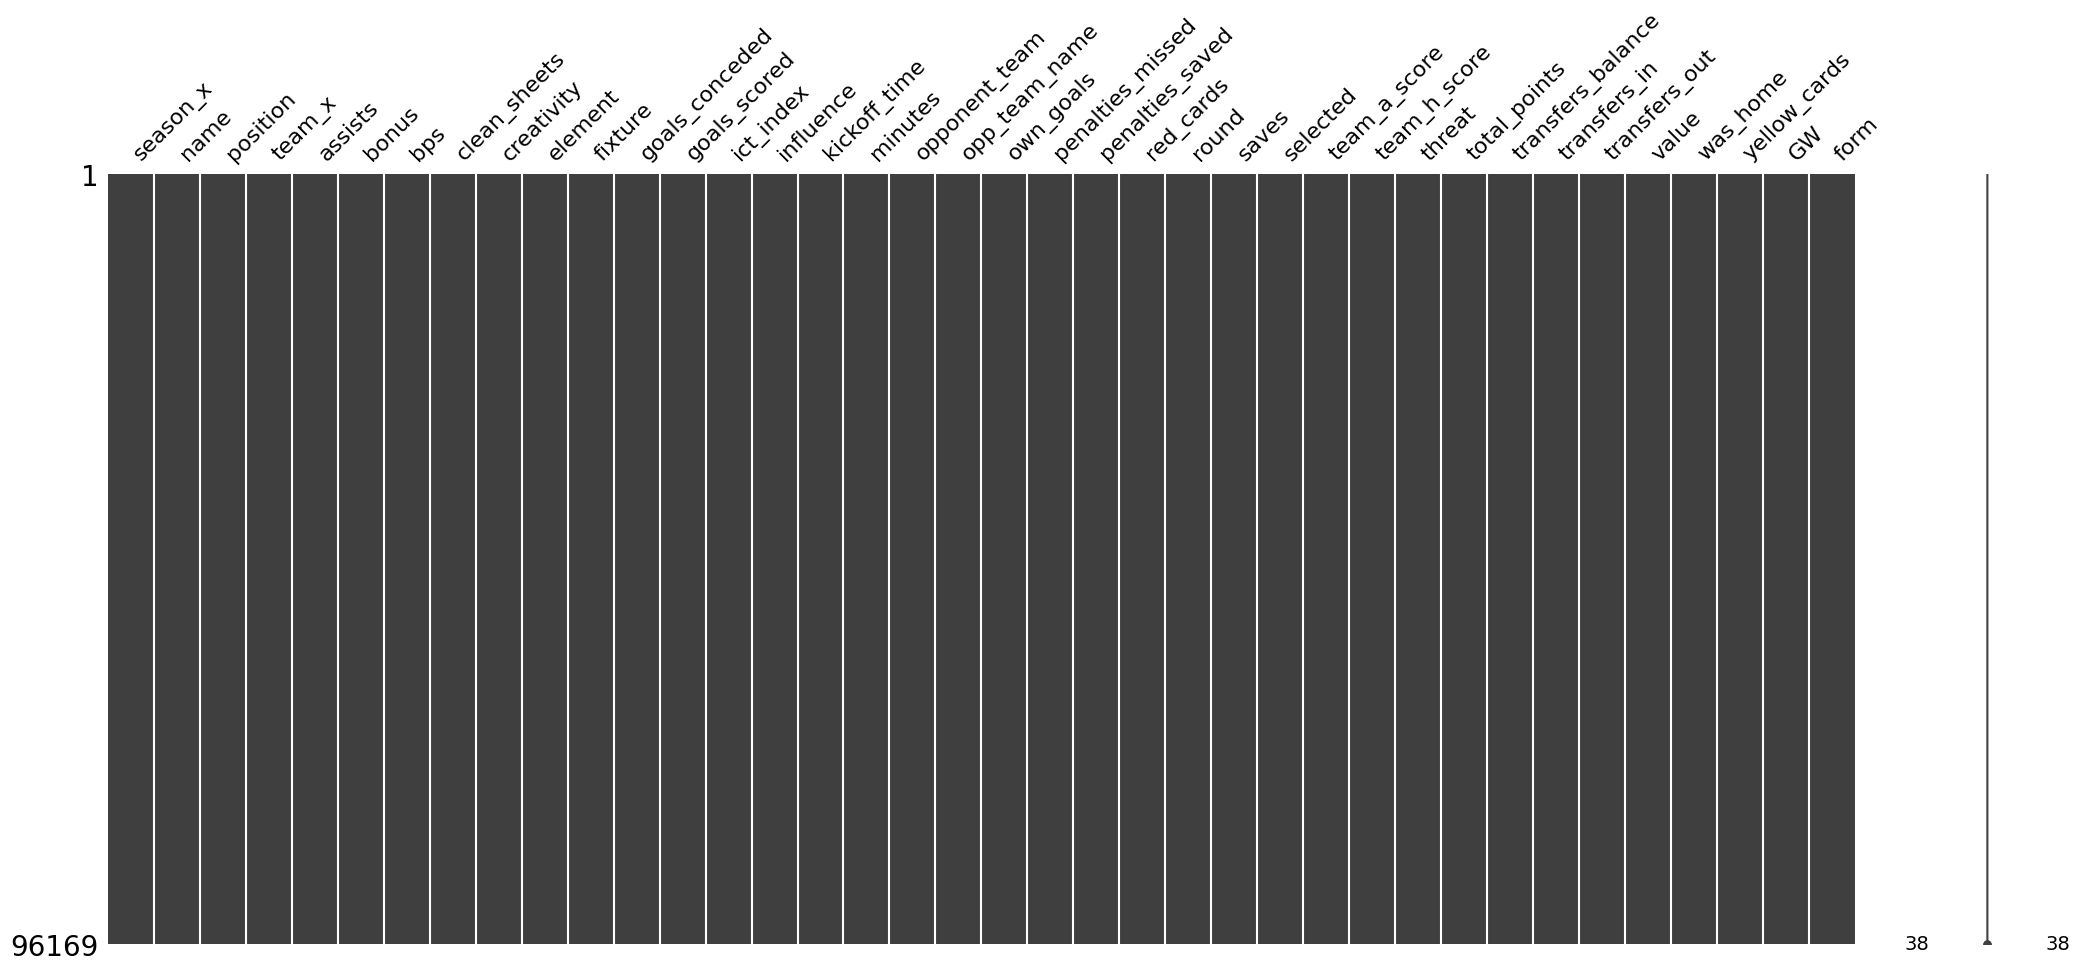

In [16]:
msno.matrix(df)

In [17]:
df[['name','team_x','GW','total_points','form']].head(50)

name    team_x  GW  total_points      form
19852  Aaron Connolly  Brighton   1             1  0.000000
20277  Aaron Connolly  Brighton   2             8  0.100000
20816  Aaron Connolly  Brighton   3             2  0.450000
21370  Aaron Connolly  Brighton   4             2  0.366667
21932  Aaron Connolly  Brighton   5             4  0.325000
22519  Aaron Connolly  Brighton   6             0  0.400000
23109  Aaron Connolly  Brighton   7             0  0.200000
23706  Aaron Connolly  Brighton   8             1  0.150000
24306  Aaron Connolly  Brighton   9             0  0.125000
24907  Aaron Connolly  Brighton  10             2  0.025000
25510  Aaron Connolly  Brighton  11             2  0.075000
26051  Aaron Connolly  Brighton  12             1  0.125000
26658  Aaron Connolly  Brighton  13             0  0.125000
27265  Aaron Connolly  Brighton  14             2  0.125000
27876  Aaron Connolly  Brighton  15             0  0.125000
28489  Aaron Connolly  Brighton  16             0  0.075000
28981  Aaron Connolly  Brighton  17             5  0.050000
29539  Aaron Connolly  Brighton  18             0  0.175000
29939  Aaron Connolly  Brighton  19             0  0.125000
30892  Aaron Connolly  Brighton  20             0  0.125000
31536  Aaron Connolly  Brighton  21             1  0.125000
32186  Aaron Connolly  Brighton  22             1  0.025000
32849  Aaron Connolly  Brighton  23             2  0.050000
33517  Aaron Connolly  Brighton  24             0  0.100000
34319  Aaron Connolly  Brighton  25             0  0.100000
35062  Aaron Connolly  Brighton  26             2  0.075000
36405  Aaron Connolly  Brighton  27             0  0.100000
37146  Aaron Connolly  Brighton  28             0  0.050000
37723  Aaron Connolly  Brighton  29             0  0.050000
38109  Aaron Connolly  Brighton  30             0  0.050000
38796  Aaron Connolly  Brighton  31             0  0.000000
39489  Aaron Connolly  Brighton  32             0  0.000000
40145  Aaron Connolly  Brighton  33             1  0.000000
40706  Aaron Connolly  Brighton  34             0  0.025000
41456  Aaron Connolly  Brighton  35             0  0.025000
42366  Aaron Connolly  Brighton  36             0  0.025000
42980  Aaron Connolly  Brighton  37             0  0.025000
43688  Aaron Connolly  Brighton  38             1  0.000000
44691  Aaron Connolly  Brighton   1             0  0.000000
45255  Aaron Connolly  Brighton   2             1  0.000000
45831  Aaron Connolly  Brighton   3             0  0.050000
46429  Aaron Connolly  Brighton   4             0  0.033333
47035  Aaron Connolly  Brighton   5             0  0.025000
47646  Aaron Connolly  Brighton   6             1  0.025000
48259  Aaron Connolly  Brighton   7             0  0.025000
48875  Aaron Connolly  Brighton   8             0  0.025000
49493  Aaron Connolly  Brighton   9             0  0.025000
50116  Aaron Connolly  Brighton  10             0  0.025000
50740  Aaron Connolly  Brighton  11             0  0.000000
51370  Aaron Connolly  Brighton  12             0  0.000000

In [18]:
df['position'] = df['position'].replace('GKP', 'GK')


# Data Engineering Analysis Questions

## Question A: Which player positions score the largest sum of total points on average across seasons?


In [19]:
# Question A: Position Analysis - Total Points Across Seasons

# First, let's examine the position distribution
print("Available positions in the dataset:")
print(df['position'].value_counts())
print("\nPosition mapping:")
position_mapping = {
    'GK': 'Goalkeeper',
    'DEF': 'Defender', 
    'MID': 'Midfielder',
    'FWD': 'Forward'
}
print(position_mapping)


Available positions in the dataset:
position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64

Position mapping:
{'GK': 'Goalkeeper', 'DEF': 'Defender', 'MID': 'Midfielder', 'FWD': 'Forward'}


In [20]:
# group by season and position and get the sum of total points and the count of players
position_stats = (
    df.groupby(['season_x', 'position'])['total_points']
      .agg(['sum', 'count'])
      .round(2)
      .reset_index()
      .rename(columns={'sum': 'total_points_sum', 'count': 'player_count'})
)

print(position_stats)


   season_x position  total_points_sum  player_count
0   2016-17      DEF              5536          3152
1   2016-17      FWD              3180          1402
2   2016-17       GK              1720           904
3   2016-17      MID              6493          3109
4   2017-18      DEF              7018          4102
5   2017-18      FWD              3462          1643
6   2017-18       GK              2220          1281
7   2017-18      MID              8428          4259
8   2020-21      DEF             10461          8626
9   2020-21      FWD              4538          3113
10  2020-21       GK              2872          2768
11  2020-21      MID             13577          9858
12  2021-22      DEF             10568          8620
13  2021-22      FWD              4269          3398
14  2021-22       GK              2724          2910
15  2021-22      MID             13853         10519
16  2022-23      DEF              9943          9183
17  2022-23      FWD              4430        

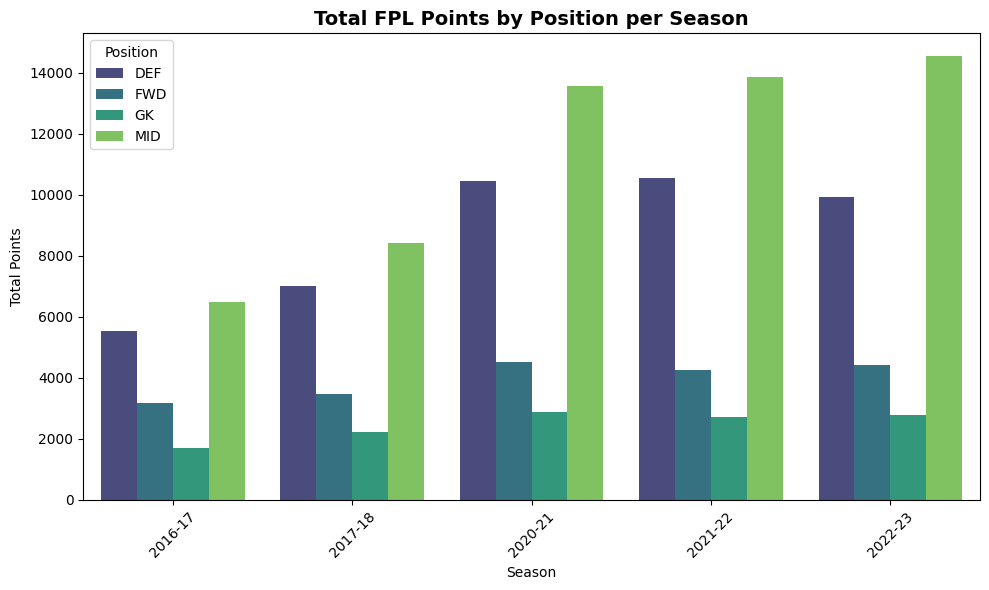

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style
# sns.set(style="whitegrid")

# Your DataFrame is called df_position_stats
# Example: df_position_stats = position_stats

plt.figure(figsize=(10, 6))

# Grouped barplot
sns.barplot(
    data=position_stats,
    x='season_x',
    y='total_points_sum',
    hue='position',
    palette='viridis'
)

plt.title('Total FPL Points by Position per Season', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Position', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
# Average total points per position across all seasons
avg_points_by_position = (
    position_stats
    .groupby('position')['total_points_sum']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='total_points_sum', ascending=False)
)

print(avg_points_by_position)


  position  total_points_sum
3      MID           11384.4
0      DEF            8705.2
1      FWD            3975.8
2       GK            2463.2


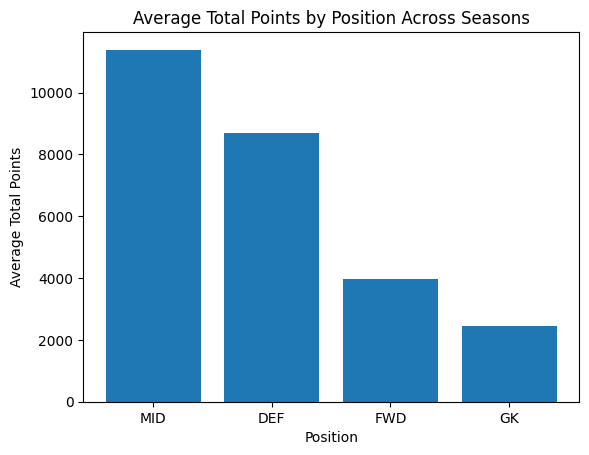

In [23]:
plt.bar(avg_points_by_position['position'], avg_points_by_position['total_points_sum'])
plt.title('Average Total Points by Position Across Seasons')
plt.xlabel('Position')
plt.ylabel('Average Total Points')
plt.show()

### Midfielders consistently have the highest total points across seasons.
### This suggests they contribute the most overall in FPL, on average.

## Question B: Top 5 Players Form Evolution During 2022-23 Season


In [24]:
# Question B: Top 5 Players Analysis for 2022-23 Season

# Filter data for 2022-23 season
df_2022_23 = df[df['season_x'] == '2022-23'].copy()

print(f"Total records for 2022-23 season: {len(df_2022_23)}")
print(f"Unique players in 2022-23: {df_2022_23['name'].nunique()}")
print(f"Gameweeks range: {df_2022_23['GW'].min()} - {df_2022_23['GW'].max()}")

# Check if we have form data
print(f"\nForm column statistics:")
print(df_2022_23['form'].describe())


Total records for 2022-23 season: 26505
Unique players in 2022-23: 777
Gameweeks range: 1 - 38

Form column statistics:
count    26505.000000
mean         0.117056
std          0.172477
min         -0.200000
25%          0.000000
50%          0.025000
75%          0.200000
max          1.500000
Name: form, dtype: float64


In [25]:
# Find top 5 players by total points in 2022-23
player_total_points = df_2022_23.groupby('name')['total_points'].sum().sort_values(ascending=False)
top_5_total_points = player_total_points.head(5)

print("Top 5 Players by Total Points (2022-23):")
for i, (player, points) in enumerate(top_5_total_points.items(), 1):
    print(f"{i}. {player}: {points} points")

# # Find top 5 players by average form in 2022-23
# player_avg_form = df_2022_23.groupby('name')['form'].mean().sort_values(ascending=False)
# top_5_form = player_avg_form.head(5)

# print("\nTop 5 Players by Average Form (2022-23):")
# for i, (player, form) in enumerate(top_5_form.items(), 1):
#     print(f"{i}. {player}: {form:.3f} form")


Top 5 Players by Total Points (2022-23):
1. Erling Haaland: 272 points
2. Harry Kane: 263 points
3. Mohamed Salah: 239 points
4. Martin Ødegaard: 212 points
5. Marcus Rashford: 205 points


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

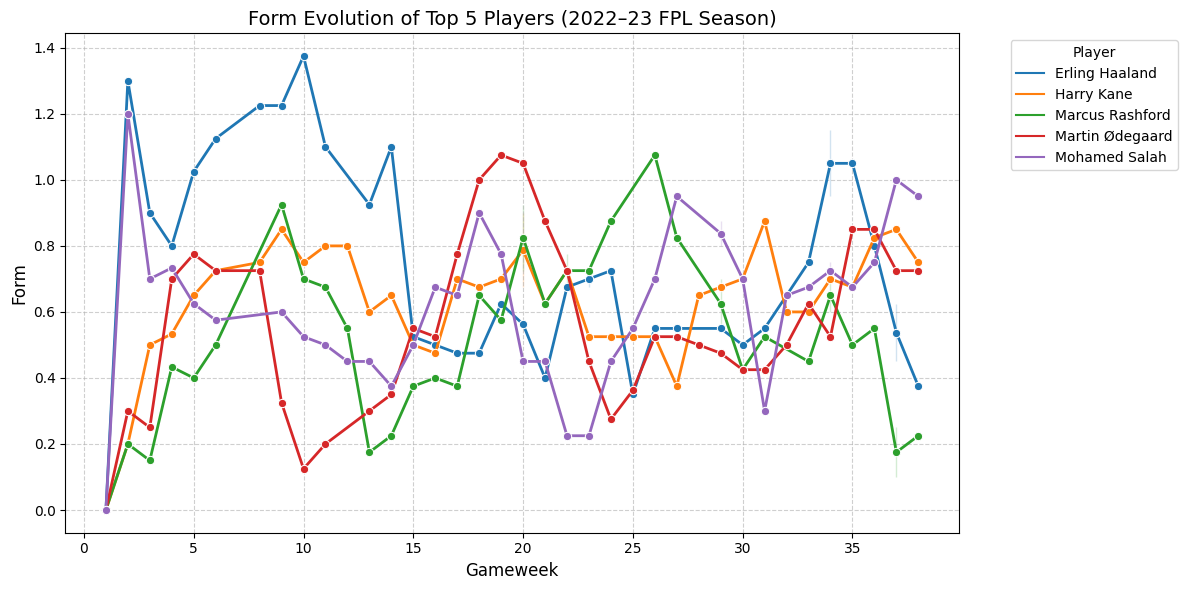

In [26]:
# Visualization for Question B - Form Evolution Analysis

# --- 1️⃣ Filter dataset for 2022–23 season only ---
df_2022_23 = df[df['season_x'] == '2022-23']

# --- 2️⃣ Get top 5 players by total points ---
top_5_players = top_5_total_points.index  # from your code

# --- 3️⃣ Filter only those players ---
top5_data = df_2022_23[df_2022_23['name'].isin(top_5_players)]

# --- 4️⃣ Sort by event (gameweek) for clean plotting ---
top5_data = top5_data.sort_values(by=['GW', 'name'])

# --- 5️⃣ Plot form evolution ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top5_data,
    x='GW', y='form',
    hue='name',
    marker='o',
    linewidth=2
)

# --- 6️⃣ Add labels and title ---
plt.title('Form Evolution of Top 5 Players (2022–23 FPL Season)', fontsize=14)
plt.xlabel('Gameweek', fontsize=12)
plt.ylabel('Form', fontsize=12)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
# Get top 5 form values across all seasons with player information
top_5_form_22_23_season = df[df['season_x'] == '2022-23'][['name', 'season_x', 'team_x', 'GW', 'form']].sort_values('form', ascending=False).head(5)

print("Top 5 Form Values Across 22/23 Season:")
print(top_5_form_22_23_season)

Top 5 Form Values Across 22/23 Season:
                      name season_x     team_x  GW   form
70658          Pascal Groß  2022-23   Brighton   2  1.500
70240         Fabian Schär  2022-23  Newcastle   2  1.500
74402       Erling Haaland  2022-23   Man City  10  1.375
70743     Dejan Kulusevski  2022-23      Spurs   2  1.300
70277  Aleksandar Mitrović  2022-23     Fulham   2  1.300


In [28]:
# Just the form values and player names
top_5_form_values = df[df['season_x'] == '2022-23'][['name', 'form']].sort_values('form', ascending=False).head(5)
print("Top 5 Form Values Across All Seasons:")
print(top_5_form_values)

Top 5 Form Values Across All Seasons:
                      name   form
70658          Pascal Groß  1.500
70240         Fabian Schär  1.500
74402       Erling Haaland  1.375
70743     Dejan Kulusevski  1.300
70277  Aleksandar Mitrović  1.300


In [29]:
df.head()

season_x            name position    team_x  assists  bonus  bps  \
19852  2020-21  Aaron Connolly      FWD  Brighton        0      0   -3   
20277  2020-21  Aaron Connolly      FWD  Brighton        0      2   27   
20816  2020-21  Aaron Connolly      FWD  Brighton        0      0    2   
21370  2020-21  Aaron Connolly      FWD  Brighton        0      0    7   
21932  2020-21  Aaron Connolly      FWD  Brighton        1      0   13   

       clean_sheets  creativity  element  ...  threat  total_points  \
19852             0         0.3       78  ...    32.0             1   
20277             1        11.3       78  ...    23.0             8   
20816             0        12.1       78  ...     8.0             2   
21370             0         0.3       78  ...     4.0             2   
21932             0        10.3       78  ...     2.0             4   

       transfers_balance  transfers_in  transfers_out value  was_home  \
19852                  0             0              0    55      True   
20277              -1161          5332           6493    55     False   
20816              13526         26823          13297    55      True   
21370              -1311         10399          11710    55     False   
21932              -8992          5860          14852    55     False   

       yellow_cards GW      form  
19852             0  1  0.000000  
20277             0  2  0.100000  
20816             0  3  0.450000  
21370             0  4  0.366667  
21932             0  5  0.325000  

[5 rows x 38 columns]

## Summary and Conclusions


# Data Cleaning

# **getting that every player played in 1 Club in each GW through every season**



In [30]:
#this will make groups having :season, name, count of gameweeks under the name num_GWs

gw_counts = df.groupby(['season_x', 'name'])['GW'].count().reset_index()
gw_counts.rename(columns={'GW': 'num_GWs'}, inplace=True)

#this will have the portion of the dataframe that doesn't have 38 entries represented by the number of GW != 38
incomplete_players = gw_counts[gw_counts['num_GWs'] != 38]

print(f"Number of players without 38 GWs: {len(incomplete_players)}")


if incomplete_players.empty:
    print("✅ All players have exactly 38 Gameweeks!")
else:
    print("⚠️ Some players are missing or have extra Gameweeks.")

#this will return the number of GW and number of entries next to it 
# gw_counts['num_GWs'].value_counts().sort_index()
# print(gw_counts['num_GWs']<38)
print(gw_counts[gw_counts['num_GWs']==1])

Number of players without 38 GWs: 674
⚠️ Some players are missing or have extra Gameweeks.
     season_x                     name  num_GWs
2     2016-17           Aaron Ramsdale        1
215   2016-17             Sam Surridge        1
334   2017-18            Dwight McNeil        1
802   2020-21          Hannibal Mejbri        1
1080  2020-21                Nile John        1
1194  2020-21         Sylvester Jasper        1
1216  2020-21           Tim Iroegbunam        1
1232  2020-21          Tyrese Francois        1
1251  2020-21             William Fish        1
1252  2020-21            William Osula        1
1384  2021-22           Charlie Savage        1
2499  2022-23           Mark Gillespie        1
2670  2022-23        Samuel Amo-Ameyaw        1
2770  2022-23  Yago de Santiago Alonso        1


**getting the number of GWs played by players in each season and the corresponding number for how many player played that number of GW in each season**

In [31]:
gw_counts['num_GWs'].value_counts().sort_index()

num_GWs
1       14
2        8
3        9
4        9
5       12
6        5
7        5
8        8
9        9
10       7
11       8
12       3
13      15
14      10
15      13
16      11
17      23
18      46
19      28
20      22
21      32
22      25
23      22
24      18
25      12
26      10
27      19
28       4
29      13
30      10
31      14
32      17
33      33
34      32
35      58
36      44
37      34
38    2108
39       7
40       1
42       1
55       1
76       2
Name: count, dtype: int64

# **seeing the one exmple of the players having more than 38 GWs and checking if he is assigned to more than one team in each GW**


In [32]:
# --- Step 1: Find players with more than 38 entries ---
players_over_38 = gw_counts[gw_counts['num_GWs'] > 38]

# --- Step 2: For one of them, inspect their teams ---
# (Pick one player who has >38 entries and see if they changed teams)
example_player = players_over_38.iloc[8]
season = example_player['season_x']
name = example_player['name']

print(f"Inspecting {name} in season {season}...")
# display(df[(df['season_x'] == season) & (df['name'] == name)][['GW', 'team_x']].sort_values('GW'))

display(df[(df['season_x'] == season) & (df['name'] == name)][['name','season_x','GW', 'team_x', 'total_points',"element"]].sort_values('GW'))

display(df[(df['season_x'] == season) & (df['name'] == name)].count())
# df[(df['season_x'] == season) & (df['name'] == name)].count()

Inspecting Donny van de Beek in season 2021-22...


name season_x  GW   team_x  total_points  element
44344  Donny van de Beek  2021-22   1  Man Utd             0      282
44901  Donny van de Beek  2021-22   2  Man Utd             0      282
45470  Donny van de Beek  2021-22   3  Man Utd             0      282
46052  Donny van de Beek  2021-22   4  Man Utd             1      282
46651  Donny van de Beek  2021-22   5  Man Utd             0      282
47257  Donny van de Beek  2021-22   6  Man Utd             0      282
47868  Donny van de Beek  2021-22   7  Man Utd             0      282
48481  Donny van de Beek  2021-22   8  Man Utd             0      282
49099  Donny van de Beek  2021-22   9  Man Utd             0      282
49718  Donny van de Beek  2021-22  10  Man Utd             0      282
50341  Donny van de Beek  2021-22  11  Man Utd             1      282
50968  Donny van de Beek  2021-22  12  Man Utd             7      282
51594  Donny van de Beek  2021-22  13  Man Utd             1      282
52173  Donny van de Beek  2021-22  14  Man Utd             1      282
52809  Donny van de Beek  2021-22  15  Man Utd             1      282
53440  Donny van de Beek  2021-22  16  Man Utd             1      282
54711  Donny van de Beek  2021-22  19  Man Utd             0      282
55163  Donny van de Beek  2021-22  20  Man Utd             0      282
55866  Donny van de Beek  2021-22  21  Man Utd             0      282
56591  Donny van de Beek  2021-22  22  Man Utd             1      282
56592  Donny van de Beek  2021-22  22  Man Utd             0      282
57143  Donny van de Beek  2021-22  23  Man Utd             0      282
57880  Donny van de Beek  2021-22  24  Everton             1      282
58538  Donny van de Beek  2021-22  25  Everton             3      282
59306  Donny van de Beek  2021-22  26  Everton             2      282
60400  Donny van de Beek  2021-22  27  Everton             2      282
60947  Donny van de Beek  2021-22  28  Everton             1      282
61936  Donny van de Beek  2021-22  29  Everton             2      282
61937  Donny van de Beek  2021-22  29  Everton             0      282
63353  Donny van de Beek  2021-22  31  Everton             0      282
63354  Donny van de Beek  2021-22  31  Everton             0      282
64113  Donny van de Beek  2021-22  32  Everton             0      282
64908  Donny van de Beek  2021-22  33  Everton             0      282
65722  Donny van de Beek  2021-22  34  Everton             0      282
66486  Donny van de Beek  2021-22  35  Everton             0      282
67120  Donny van de Beek  2021-22  36  Everton             0      282
67121  Donny van de Beek  2021-22  36  Everton             0      282
68313  Donny van de Beek  2021-22  37  Everton             0      282
68314  Donny van de Beek  2021-22  37  Everton             0      282
69093  Donny van de Beek  2021-22  38  Everton             6      282

season_x             40
name                 40
position             40
team_x               40
assists              40
bonus                40
bps                  40
clean_sheets         40
creativity           40
element              40
fixture              40
goals_conceded       40
goals_scored         40
ict_index            40
influence            40
kickoff_time         40
minutes              40
opponent_team        40
opp_team_name        40
own_goals            40
penalties_missed     40
penalties_saved      40
red_cards            40
round                40
saves                40
selected             40
team_a_score         40
team_h_score         40
threat               40
total_points         40
transfers_balance    40
transfers_in         40
transfers_out        40
value                40
was_home             40
yellow_cards         40
GW                   40
form                 40
dtype: int64

# **Function that handles deleting the entries that have GWs with the old team after the transfer**
* the reason why this happens is becase a player transfered to another team in the PL and the dataset kept recording GW for both old and new team after the transfer

**we will get the GW that the new team started appearing and after that week we will drop any newer GW recorded under the old team**

* **we will pass to the function group of records of each player in a specific season as a smaller dataframe**
* **after that you will see if there exist more than one unique team for this group otherwise return the group**
* **get the week that the second team started appearing and name it the transfer GW**
* **return the group after getting rid of any GW after the transfer GW that is under the old team name**

In [33]:
# # Step 2️⃣: Define a function that detects team changes and keeps only final team entries
# def keep_new_team_after_transfer(player_df):
#     """
#     For a given player in a given season:
#     - If they have only one team -> keep all rows.
#     - If they have multiple teams -> find when the new team first appears,
#       and keep only rows from the new team(s) from that GW onward.
#     """
#     teams = player_df['team_x'].unique()
    
#     # If player has only one team, return as-is
#     if len(teams) == 1:
#         return player_df

#     # Otherwise, player has switched teams mid-season
#     # Find the earliest GW where a new team appears (not equal to the first team)
#     first_team = player_df['team_x'].iloc[0]
#     for _, row in player_df.iterrows():
#         if row['team_x'] != first_team:
#             transfer_gw = row['GW']
#             new_team = row['team_x']
#             break
    
#     # Keep only rows from the new team and GWs >= transfer_gw
#     # filtered = player_df[(player_df['team_x'] == new_team) & (player_df['GW'] >= transfer_gw)]
#     # return filtered

#     keep_mask = ((player_df['team_x'] == first_team) & (player_df['GW'] < transfer_gw)) | \
#                 ((player_df['team_x'] == new_team) & (player_df['GW'] >= transfer_gw))

#     return player_df[keep_mask]


# **passing the groups to the function**

In [34]:
# df = (
#     df.groupby(['season_x', 'name'], group_keys=False)
#       .apply(keep_new_team_after_transfer)
#       .reset_index(drop=True)
# )

In [35]:
gw_counts['num_GWs'].value_counts().sort_index()

num_GWs
1       14
2        8
3        9
4        9
5       12
6        5
7        5
8        8
9        9
10       7
11       8
12       3
13      15
14      10
15      13
16      11
17      23
18      46
19      28
20      22
21      32
22      25
23      22
24      18
25      12
26      10
27      19
28       4
29      13
30      10
31      14
32      17
33      33
34      32
35      58
36      44
37      34
38    2108
39       7
40       1
42       1
55       1
76       2
Name: count, dtype: int64

In [36]:
df_filtered = df[[
    'season_x', 'name', 'position', 'team_x', 'GW', 'round',
    'minutes', 'goals_scored', 'assists', 'clean_sheets',
    'bonus', 'creativity', 'influence', 'threat', 'ict_index',
    'total_points', 'value', 'selected', 'was_home', 'opp_team_name'
]]

df_filtered = df_filtered.drop_duplicates()

# 🧩 3️⃣ Handle missing values (optional — depends on your analysis)
df_filtered = df_filtered.dropna(subset=['total_points', 'position', 'team_x'])

# 🧩 4️⃣ Reset index for clean display
df_filtered = df_filtered.reset_index(drop=True)

print("✅ Cleaned dataset shape:", df_filtered.shape)
print("✅ Columns kept:", df_filtered.columns.tolist())

✅ Cleaned dataset shape: (96169, 20)
✅ Columns kept: ['season_x', 'name', 'position', 'team_x', 'GW', 'round', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'bonus', 'creativity', 'influence', 'threat', 'ict_index', 'total_points', 'value', 'selected', 'was_home', 'opp_team_name']


In [37]:
df_filtered = df.copy()

In [38]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96169 entries, 19852 to 43705
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             96169 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            9616

### Encode Categorical Features

We'll use One-Hot Encoding for the `position` column since it's a nominal categorical variable with no ordinal relationship between categories (GK, DEF, MID, FWD).

In [39]:
# Check current position distribution
print("Position distribution:")
print(df_filtered['position'].value_counts())
print(f"\nUnique positions: {df_filtered['position'].unique()}")

Position distribution:
position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64

Unique positions: ['FWD' 'DEF' 'MID' 'GK']


In [40]:
# One-Hot Encode the position column
# Using drop_first=True to avoid multicollinearity (drops one category as reference)
# Convert to int (0/1) for ML model compatibility

position_encoded = pd.get_dummies(df_filtered['position'], prefix='position', drop_first=True, dtype=int)

print("One-Hot Encoded Position Columns:")
print(position_encoded.head(10))
print(f"\nNew columns created: {position_encoded.columns.tolist()}")
print(f"Shape: {position_encoded.shape}")
print(f"Data types: {position_encoded.dtypes.to_dict()}")

One-Hot Encoded Position Columns:
       position_FWD  position_GK  position_MID
19852             1            0             0
20277             1            0             0
20816             1            0             0
21370             1            0             0
21932             1            0             0
22519             1            0             0
23109             1            0             0
23706             1            0             0
24306             1            0             0
24907             1            0             0

New columns created: ['position_FWD', 'position_GK', 'position_MID']
Shape: (96169, 3)
Data types: {'position_FWD': dtype('int64'), 'position_GK': dtype('int64'), 'position_MID': dtype('int64')}


In [41]:
# Add encoded columns to the dataframe and drop original position column
df_encoded = df_filtered.copy()
df_encoded = pd.concat([df_encoded, position_encoded], axis=1)

# Drop the original 'position' column since it's now encoded
df_encoded = df_encoded.drop(columns=['position'])

print("✅ Dataset after One-Hot Encoding:")
print(f"Shape: {df_encoded.shape}")
print(f"\nFirst few rows with encoded positions:")
print(df_encoded[['name', 'team_x', 'GW', 'position_FWD', 'position_GK', 'position_MID', 'total_points']].head(10))

✅ Dataset after One-Hot Encoding:
Shape: (96169, 40)

First few rows with encoded positions:
                 name    team_x  GW  position_FWD  position_GK  position_MID  \
19852  Aaron Connolly  Brighton   1             1            0             0   
20277  Aaron Connolly  Brighton   2             1            0             0   
20816  Aaron Connolly  Brighton   3             1            0             0   
21370  Aaron Connolly  Brighton   4             1            0             0   
21932  Aaron Connolly  Brighton   5             1            0             0   
22519  Aaron Connolly  Brighton   6             1            0             0   
23109  Aaron Connolly  Brighton   7             1            0             0   
23706  Aaron Connolly  Brighton   8             1            0             0   
24306  Aaron Connolly  Brighton   9             1            0             0   
24907  Aaron Connolly  Brighton  10             1            0             0   

       total_points  
1985

## Predictive Modeling Task

### Create Target Variable: upcoming_total_points

For each player in each gameweek, we want to predict their points in the **next** gameweek. This requires shifting the `total_points` column by -1 within each player-season group.

In [42]:
# Create upcoming_total_points by shifting total_points by -1 within each player-season group
# Sort by player, season, and gameweek to ensure proper ordering

df_model = df_encoded.copy()
df_model = df_model.sort_values(by=['name', 'season_x', 'GW']).reset_index(drop=True)

# Shift total_points by -1 to get next week's points
df_model['upcoming_total_points'] = (
    df_model.groupby(['name', 'season_x'])['total_points'].shift(-1)
)

print("✅ Created upcoming_total_points column")
print(f"\nSample data showing current and upcoming points:")
print(df_model[['name', 'season_x', 'GW', 'total_points', 'upcoming_total_points']].head(15))
print(f"\nMissing values in upcoming_total_points: {df_model['upcoming_total_points'].isna().sum()}")

✅ Created upcoming_total_points column

Sample data showing current and upcoming points:
              name season_x  GW  total_points  upcoming_total_points
0   Aaron Connolly  2020-21   1             1                    8.0
1   Aaron Connolly  2020-21   2             8                    2.0
2   Aaron Connolly  2020-21   3             2                    2.0
3   Aaron Connolly  2020-21   4             2                    4.0
4   Aaron Connolly  2020-21   5             4                    0.0
5   Aaron Connolly  2020-21   6             0                    0.0
6   Aaron Connolly  2020-21   7             0                    1.0
7   Aaron Connolly  2020-21   8             1                    0.0
8   Aaron Connolly  2020-21   9             0                    2.0
9   Aaron Connolly  2020-21  10             2                    2.0
10  Aaron Connolly  2020-21  11             2                    1.0
11  Aaron Connolly  2020-21  12             1                    0.0
12  Aaron Conn

<Axes: >

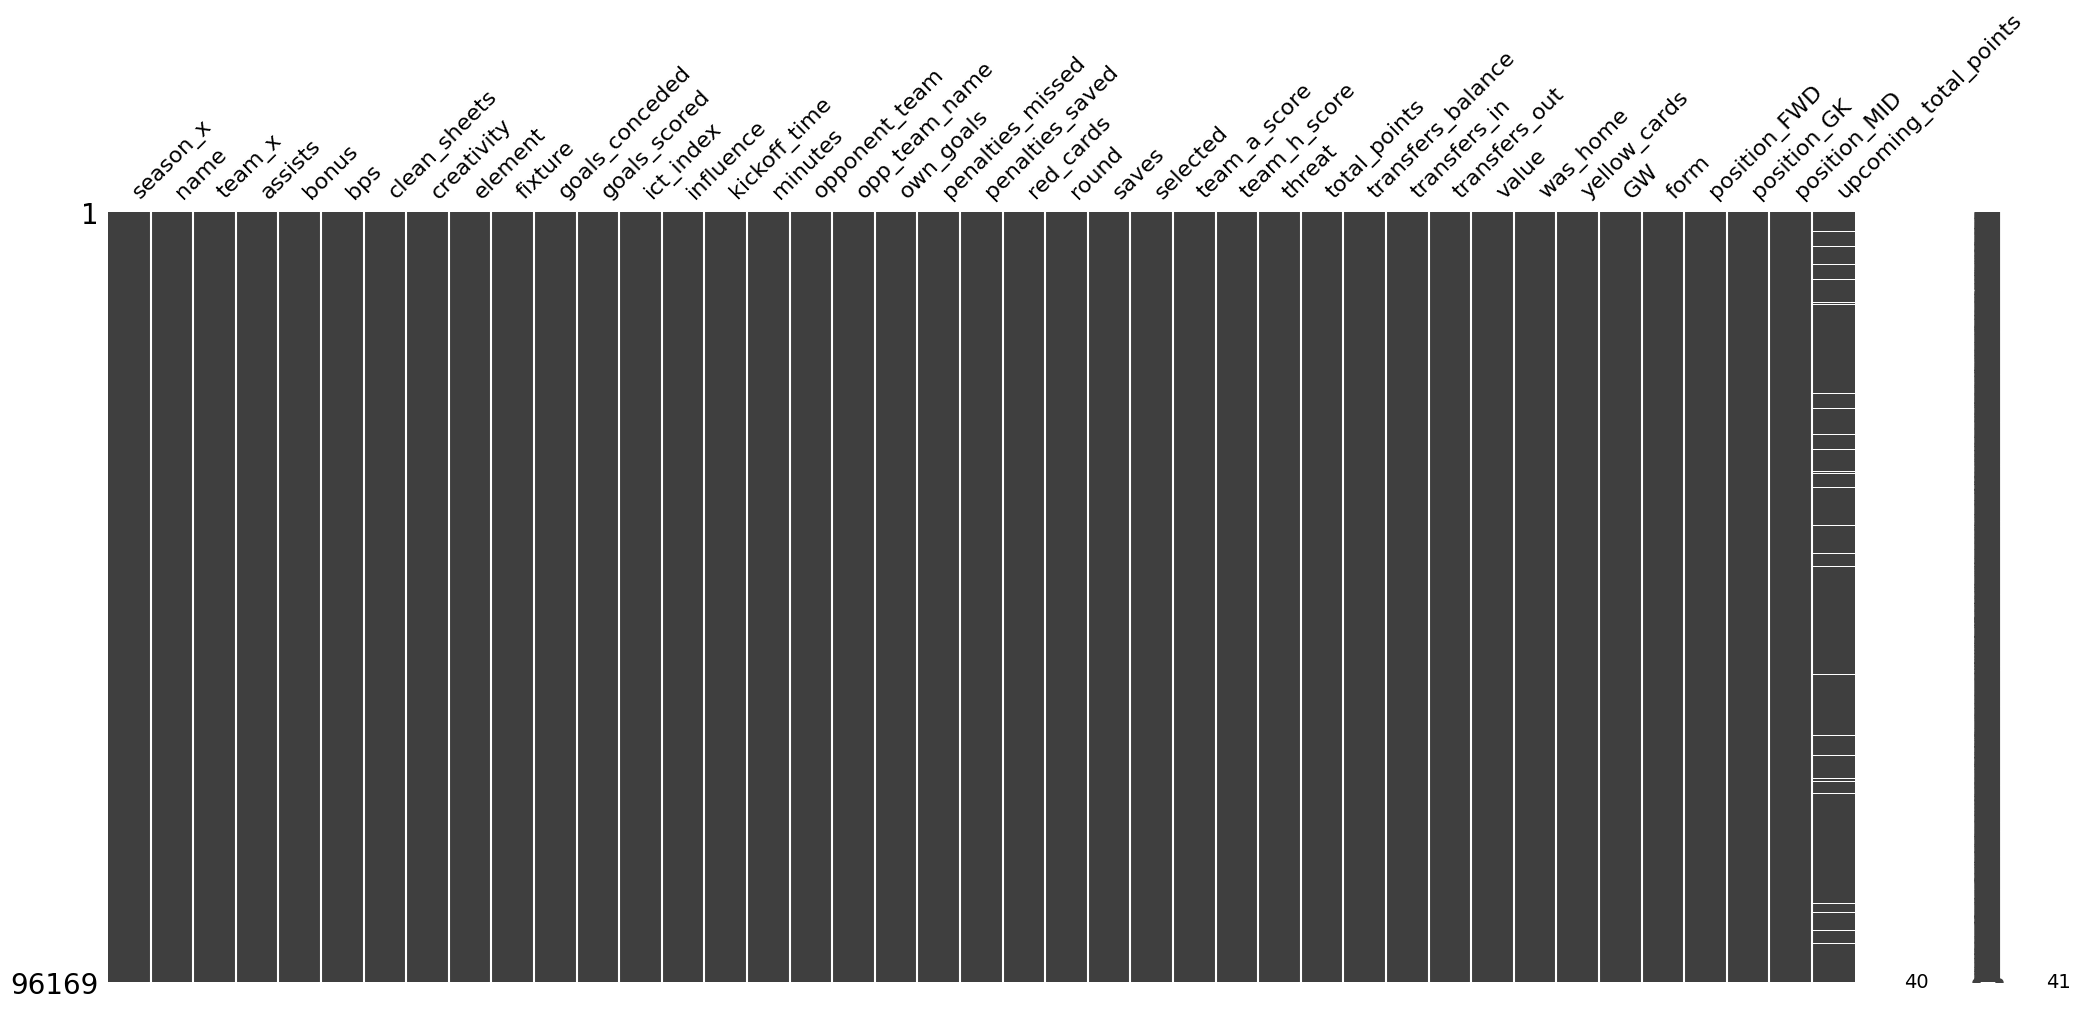

In [43]:
msno.matrix(df_model)

### Define Feature Sets

According to the task requirements:
- **Match-related features**: Events that happen in or around a game
- **Player-related features**: Characteristics describing the player's role or qualities

In [44]:
# Define feature sets based on task requirements

# Match-related features: Things that happen in or around a game
match_features = [
    'minutes',           # Minutes played
    'goals_scored',      # Goals scored in the match
    'assists',           # Assists provided
    'clean_sheets',      # Clean sheet bonus
    'goals_conceded',    # Goals conceded (for defenders/GK)
    'saves',             # Saves made (for GK)
    'bonus',             # Bonus points awarded
    'bps',               # Bonus points system score
    'yellow_cards',      # Yellow cards received
    'red_cards',         # Red cards received
    'own_goals',         # Own goals
    'penalties_missed',  # Penalties missed
    'penalties_saved',   # Penalties saved (for GK)
    'was_home',          # Home/away indicator
    'GW',                # Gameweek number (temporal context)
]

# Player-related features: Characteristics describing player's role or qualities
player_features = [
    'position_FWD',      # Position: Forward
    'position_GK',       # Position: Goalkeeper
    'position_MID',      # Position: Midfielder
    # position_DEF is implicit (all 3 position flags = 0)
    'ict_index',         # Combined ICT index
    'value',             # Player's value/cost
    'form',              # Player's recent form
    'goal_difference'
]

# Combine all features
all_features = match_features + player_features

print("📊 Feature Categories:")
print(f"\nMatch-related features ({len(match_features)}): {match_features}")
print(f"\nPlayer-related features ({len(player_features)}): {player_features}")
print(f"\nTotal features: {len(all_features)}")

📊 Feature Categories:

Match-related features (15): ['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'saves', 'bonus', 'bps', 'yellow_cards', 'red_cards', 'own_goals', 'penalties_missed', 'penalties_saved', 'was_home', 'GW']

Player-related features (7): ['position_FWD', 'position_GK', 'position_MID', 'ict_index', 'value', 'form', 'goal_difference']

Total features: 22


### Prepare Data for Modeling

Remove rows where `upcoming_total_points` is NaN (last gameweek of each player-season) and split into training/testing sets.

In [45]:
# Create a new feature: goal_difference
df_model['goal_difference'] = df_model.apply(
    lambda row: row['team_h_score'] - row['team_a_score'] if row['was_home'] else row['team_a_score'] - row['team_h_score'],
    axis=1
)

print(df_model[['name', 'GW', 'was_home', 'team_h_score', 'team_a_score', 'goal_difference']].head(10))


             name  GW  was_home  team_h_score  team_a_score  goal_difference
0  Aaron Connolly   1      True           1.0           3.0             -2.0
1  Aaron Connolly   2     False           0.0           3.0              3.0
2  Aaron Connolly   3      True           2.0           3.0             -1.0
3  Aaron Connolly   4     False           4.0           2.0             -2.0
4  Aaron Connolly   5     False           1.0           1.0              0.0
5  Aaron Connolly   6      True           1.0           1.0              0.0
6  Aaron Connolly   7     False           2.0           1.0             -1.0
7  Aaron Connolly   8      True           0.0           0.0              0.0
8  Aaron Connolly   9     False           1.0           2.0              1.0
9  Aaron Connolly  10      True           1.0           1.0              0.0


In [46]:
# Remove rows with missing upcoming_total_points (last gameweek of each player-season)
df_ml = df_model.dropna(subset=['upcoming_total_points']).copy()

# Convert was_home boolean to int if needed
if df_ml['was_home'].dtype == 'bool':
    df_ml['was_home'] = df_ml['was_home'].astype(int)

print(f"✅ Dataset prepared for modeling")
print(f"Original dataset: {len(df_model)} rows")
print(f"After removing NaN targets: {len(df_ml)} rows")
print(f"Rows dropped: {len(df_model) - len(df_ml)}")

# Verify all features exist
missing_features = [f for f in all_features if f not in df_ml.columns]
if missing_features:
    print(f"\n⚠️  Missing features: {missing_features}")
else:
    print(f"\n✅ All {len(all_features)} features are present")

# Check for any remaining NaN values in features
print(f"\nMissing values per feature:")
print(df_ml[all_features].isnull().sum()[df_ml[all_features].isnull().sum() > 0])

✅ Dataset prepared for modeling
Original dataset: 96169 rows
After removing NaN targets: 93387 rows
Rows dropped: 2782

✅ All 22 features are present

Missing values per feature:
Series([], dtype: int64)


In [47]:
# Analyze the NaN values in upcoming_total_points
# These should be the LAST gameweek for each player in each season

nan_rows = df_model[df_model['upcoming_total_points'].isna()]

print(f"Total NaN rows: {len(nan_rows)}")
print(f"\nBreakdown by gameweek:")
print(nan_rows['GW'].value_counts().sort_index())

print(f"\nSample of rows with NaN upcoming_total_points:")
print(nan_rows[['name', 'season_x', 'GW', 'total_points', 'upcoming_total_points']].head(20))

# Check if these are indeed the last gameweeks
print(f"\n🔍 Analysis: Are these the last gameweeks for each player-season?")
for idx in nan_rows.head(5).index:
    row = df_model.loc[idx]
    player_season = df_model[(df_model['name'] == row['name']) & (df_model['season_x'] == row['season_x'])]
    max_gw = player_season['GW'].max()
    print(f"{row['name']} in {row['season_x']}: GW {row['GW']} (max GW: {max_gw})")

Total NaN rows: 2782

Breakdown by gameweek:
GW
38    2782
Name: count, dtype: int64

Sample of rows with NaN upcoming_total_points:
                name season_x  GW  total_points  upcoming_total_points
37    Aaron Connolly  2020-21  38             1                    NaN
75    Aaron Connolly  2021-22  38             0                    NaN
113  Aaron Cresswell  2016-17  38             2                    NaN
151  Aaron Cresswell  2017-18  38             2                    NaN
189  Aaron Cresswell  2020-21  38             6                    NaN
227  Aaron Cresswell  2021-22  38             1                    NaN
265  Aaron Cresswell  2022-23  38             1                    NaN
303     Aaron Hickey  2022-23  38             6                    NaN
341     Aaron Lennon  2016-17  38             0                    NaN
379     Aaron Lennon  2017-18  38             2                    NaN
415     Aaron Lennon  2021-22  38             1                    NaN
453       Aaron

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [48]:
# Check if there are mid-season NaN values (players who stopped playing before GW 38)
# These would represent injuries, transfers, or players who left mid-season

nan_analysis = df_ml[df_ml['upcoming_total_points'].isna()].copy()

print("=" * 60)
print("ANALYSIS OF NaN VALUES IN upcoming_total_points")
print("=" * 60)

# Check if ALL NaN are at GW 38 (end of season)
print(f"\nTotal NaN values: {nan_analysis.shape[0]}")
print(f"\nGameweek distribution of NaN values:")
print(nan_analysis['GW'].value_counts().sort_index())

# Are there any mid-season NaN values (GW < 38)?
mid_season_nan = nan_analysis[nan_analysis['GW'] < 38]
print(f"\n🔍 Mid-season NaN values (GW < 38): {len(mid_season_nan)}")

if len(mid_season_nan) > 0:
    print("\n⚠️ WARNING: Found mid-season NaN values!")
    print("These represent players whose season ended early (injury, transfer, etc.)")
    print("\nSample of mid-season NaN cases:")
    print(mid_season_nan[['name', 'season_x', 'GW', 'team_x', 'total_points', 'upcoming_total_points']].head(10))
else:
    print("\n✅ All NaN values are at GW 38 (end of season)")
    print("These are expected boundary cases with no 'next week' to predict.")

ANALYSIS OF NaN VALUES IN upcoming_total_points

Total NaN values: 0

Gameweek distribution of NaN values:
Series([], Name: count, dtype: int64)

🔍 Mid-season NaN values (GW < 38): 0

✅ All NaN values are at GW 38 (end of season)
These are expected boundary cases with no 'next week' to predict.


In [49]:
# NOW let's properly analyze the NaN values in df_model (before dropping)
print("=" * 70)
print("DETAILED ANALYSIS OF NaN VALUES IN upcoming_total_points")
print("=" * 70)

nan_rows_full = df_model[df_model['upcoming_total_points'].isna()].copy()

print(f"\nTotal NaN values: {len(nan_rows_full)} out of {len(df_model)} rows ({len(nan_rows_full)/len(df_model)*100:.2f}%)")

print(f"\n📊 Gameweek distribution of NaN values:")
gw_dist = nan_rows_full['GW'].value_counts().sort_index()
print(gw_dist)

# Check for mid-season NaN (GW < 38)
mid_season_nan_full = nan_rows_full[nan_rows_full['GW'] < 38]
print(f"\n🔍 Mid-season NaN values (GW < 38): {len(mid_season_nan_full)}")

if len(mid_season_nan_full) > 0:
    print("\n⚠️ WARNING: Found mid-season NaN values!")
    print("These likely represent players whose season ended early due to:")
    print("  - Injury")
    print("  - Transfer to another league")
    print("  - End of loan spell")
    print("  - Retirement")
    
    print(f"\nSample of mid-season NaN cases:")
    sample = mid_season_nan_full[['name', 'season_x', 'GW', 'team_x', 'minutes', 'total_points']].head(20)
    print(sample)
    
    print(f"\n💡 Decision needed:")
    print(f"   - DROP: If we can't predict when a season ends early (recommended)")
    print(f"   - IMPUTE: Only if we want to predict 'end of availability' (complex)")
else:
    print("\n✅ ALL NaN values are at GW 38 (end of season)")
    print("These are expected boundary cases - no 'next week' exists.")
    print("Action: DROP these rows (already done in df_ml)")

DETAILED ANALYSIS OF NaN VALUES IN upcoming_total_points

Total NaN values: 2782 out of 96169 rows (2.89%)

📊 Gameweek distribution of NaN values:
GW
38    2782
Name: count, dtype: int64

🔍 Mid-season NaN values (GW < 38): 0

✅ ALL NaN values are at GW 38 (end of season)
These are expected boundary cases - no 'next week' exists.
Action: DROP these rows (already done in df_ml)


### ⚠️ Important: Why We Drop NaN values (Not Impute)

The NaN values in `upcoming_total_points` are **NOT missing data** - they are **structurally impossible values**.

**Analysis Results:**
- Total NaN values: **2,782 (2.89% of dataset)**
- **ALL 2,782 occur at Gameweek 38** (final gameweek of each season)
- **ZERO mid-season NaN values** (no injuries/transfers causing early season ends)

**Why These NaN Values Exist:**
- Each season ends at GW 38 - there is no GW 39
- For each player-season combination, their final gameweek cannot have an "upcoming" value
- This is a natural boundary condition in time-series forecasting

**Why NOT to Impute:**
- ❌ You can't impute what doesn't exist (there is no GW 39)
- ❌ Imputing would create fictional target values
- ❌ It would violate the prediction task logic

**Why We MUST Drop:**
- ✅ These rows have no valid target to predict
- ✅ Training on them would be meaningless
- ✅ This is the correct approach for time-series with boundary conditions
- ✅ No information loss since these are structural impossibilities, not missing data

**Note on Mid-Season Endings:**
If a player's season ended early (injury, transfer), they simply don't have rows for subsequent gameweeks in this dataset. They don't appear as NaN values - they're just absent from later GWs.

In [50]:
# Split data chronologically - use 2022-23 season as test set
# This mimics real-world scenario where we predict future based on past

train_df = df_ml[df_ml['season_x'] != '2022-23'].copy()
test_df = df_ml[df_ml['season_x'] == '2022-23'].copy()

# Prepare X and y for training and testing
X_train = train_df[all_features]
y_train = train_df['upcoming_total_points']

X_test = test_df[all_features]
y_test = test_df['upcoming_total_points']

print("📊 Train/Test Split:")
print(f"Training set: {len(X_train)} samples from seasons before 2022-23")
print(f"Test set: {len(X_test)} samples from 2022-23 season")
print(f"\nFeature matrix shape: {X_train.shape}")
print(f"Target variable shape: {y_train.shape}")
print(f"\nTarget statistics (training):")
print(y_train.describe())

📊 Train/Test Split:
Training set: 67659 samples from seasons before 2022-23
Test set: 25728 samples from 2022-23 season

Feature matrix shape: (67659, 22)
Target variable shape: (67659,)

Target statistics (training):
count    67659.000000
mean         1.449859
std          2.607302
min         -7.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         29.000000
Name: upcoming_total_points, dtype: float64


## Build Regression Models

We'll implement two approaches:
1. **Classic ML Models**: Linear Regression, Random Forest, XGBoost
2. **Neural Network**: Shallow Feed-Forward Neural Network (FFNN)

All models will be evaluated using: MAE, MSE, RMSE, and R²

In [51]:
# Install TensorFlow and XGBoost
%pip install tensorflow xgboost

Note: you may need to restart the kernel to use updated packages.


### ⚠️ After Installing Packages - Run These Cells

Since the kernel was restarted, please re-run these cells in order:
1. **Cell 2**: Import pandas, matplotlib, seaborn, missingno
2. **Cell 3**: Load the main dataset
3. **Cell 46**: Create df_filtered = df.copy()  
4. **Cell 48**: Drop popularity columns
5. **Cell 51**: One-hot encode positions
6. **Cell 52**: Create df_encoded
7. **Cell 55**: Create upcoming_total_points (df_model)
8. **Cell 60**: Prepare df_ml (drop NaN values)
9. **Cell 65**: Train/test split

Or use "Run All Above" on cell 70 to execute all preceding cells automatically.

In [52]:
# Import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# For Neural Network - TensorFlow/Keras
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models, regularizers, optimizers, callbacks
    print("✅ TensorFlow/Keras available")
    tf_available = True
except ImportError as e:
    print(f"⚠️  TensorFlow not installed: {e}")
    print("Will skip Neural Network.")
    tf_available = False
    
# Try XGBoost (optional)
try:
    import xgboost as xgb
    print("✅ XGBoost available")
    xgb_available = True
except ImportError:
    print("⚠️  XGBoost not installed. Will skip XGBoost model.")
    xgb_available = False

print("\n📦 Libraries imported successfully")

✅ TensorFlow/Keras available
✅ XGBoost available

📦 Libraries imported successfully


In [53]:
def plot_fitting_line(y_true, y_pred, model_name):

    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_true, y=y_pred, color='blue', alpha=0.6, label='Predictions')
    
    max_val = max(np.max(y_true), np.max(y_pred))
    min_val = min(np.min(y_true), np.min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')
    
    sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', line_kws={'label': 'Fit Line'})
    
    plt.title(f"{model_name} — Actual vs Predicted", fontsize=14)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

In [54]:
def plot_fitting_and_print_metrics(y_test,y_pred, model_name):
    plot_fitting_line(y_test, y_pred, model_name)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.nanmean(np.abs((y_test - y_pred) / np.where(y_test == 0, np.nan, y_test))) * 100    
    print("✅ Model trained successfully!")
    print("📊 Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE):      {mae:.4f}")
    print(f"Mean Squared Error (MSE):       {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²):                 {r2:.4f}")

In [55]:
# Helper function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    """
    Calculate and display regression metrics
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # print(f"\n{'='*60}")
    print(f"📊 {model_name} - Evaluation Metrics")
    # print(f"{'='*60}")
    # print(f"Mean Absolute Error (MAE):       {mae:.4f}")
    # print(f"Mean Squared Error (MSE):        {mse:.4f}")
    # print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
    # print(f"R-squared (R²):                  {r2:.4f}")
    # print(f"{'='*60}")
    plot_fitting_and_print_metrics(y_true, y_pred, model_name)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

print("✅ Evaluation function defined")

✅ Evaluation function defined


### Approach 1: Classic Machine Learning Models

In [56]:
X_train.columns

Index(['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'saves', 'bonus', 'bps', 'yellow_cards', 'red_cards', 'own_goals',
       'penalties_missed', 'penalties_saved', 'was_home', 'GW', 'position_FWD',
       'position_GK', 'position_MID', 'ict_index', 'value', 'form',
       'goal_difference'],
      dtype='object')

🚀 Training Linear Regression...
📊 Linear Regression - Evaluation Metrics


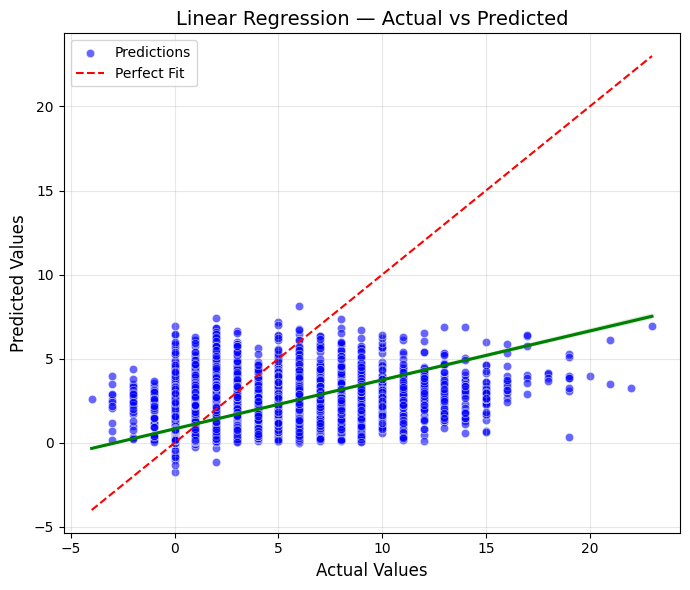

✅ Model trained successfully!
📊 Evaluation Metrics:
Mean Absolute Error (MAE):      1.0699
Mean Squared Error (MSE):       3.8932
Root Mean Squared Error (RMSE): 1.9731
Mean Absolute Percentage Error (MAPE): 73.14%
R-squared (R²):                 0.3003

💡 Interpretation:
   - On average, predictions are off by 1.07 points
   - Model explains 30.03% of variance in upcoming points


In [57]:
# Model 1: Linear Regression
print("🚀 Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

print(f"\n💡 Interpretation:")
print(f"   - On average, predictions are off by {lr_results['MAE']:.2f} points")
print(f"   - Model explains {lr_results['R2']*100:.2f}% of variance in upcoming points")

In [58]:
_features = ['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'saves', 'bonus', 'bps', 'yellow_cards', 'red_cards', 'own_goals',
       'penalties_missed', 'penalties_saved', 'was_home', 'GW', 'position_FWD',
       'position_GK', 'position_MID', 'ict_index', 'value', 'form',
       'goal_difference']

def safe_get(row, key, default=0):
    if isinstance(row, dict):
        return row.get(key, default)
    else: 
       # for pandas series
        return row[key] if key in row else default
def preprocess_row(row, features=_features, scaler=None):

        
    position = str(safe_get(row,'position', '')).upper()
    pos_FWD = 1 if position == 'FWD' else 0
    pos_MID = 1 if position == 'MID' else 0
    pos_GK  = 1 if position == 'GK' or position == 'GKP' else 0

    was_home = bool(safe_get(row, 'was_home', False))
    team_h_score = safe_get(row, 'team_h_score', 0)
    team_a_score = safe_get(row, 'team_a_score', 0)
    goal_difference = (
        team_h_score - team_a_score if was_home
        else team_a_score - team_h_score
    )

    features_dict = {
        k:safe_get(row,k,0) for k in features   
    }
    features_dict.update({
         'position_FWD': pos_FWD,
        'position_GK': pos_GK,
        'position_MID': pos_MID,
        'goal_difference': goal_difference
    })
    
    if scaler is not None:
        X = pd.DataFrame([[features_dict[f] for f in features]], columns=features)
        X_scaled = scaler.transform(X)
        for i, f in enumerate(features):
            features_dict[f] = float(X_scaled[0, i])
    
    # order
    ordered_features_dict = {f: features_dict[f] for f in features}


    return ordered_features_dict

In [59]:
def predict_single(row):
    
    if "GK" in safe_get(row,'position',""):
        model = model_GK
        features = features_gk
        scaler = scaler_gk
    else:
        model = lr_model
        features = _features
        scaler = None
        
    processed = preprocess_row(row, features, scaler)
    X = pd.DataFrame([[processed[feat] for feat in features]], columns=features)    
    prediction = model.predict(X)
    return "the predicted value for the given row is: " + str(float(prediction[0]))


In [60]:
from sklearn.model_selection import train_test_split

# Use 'upcoming_total_points' as the target variable
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    df_ml[all_features], df_ml['upcoming_total_points'], test_size=0.2, random_state=42
)

🚀 Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


📊 Random Forest - Evaluation Metrics


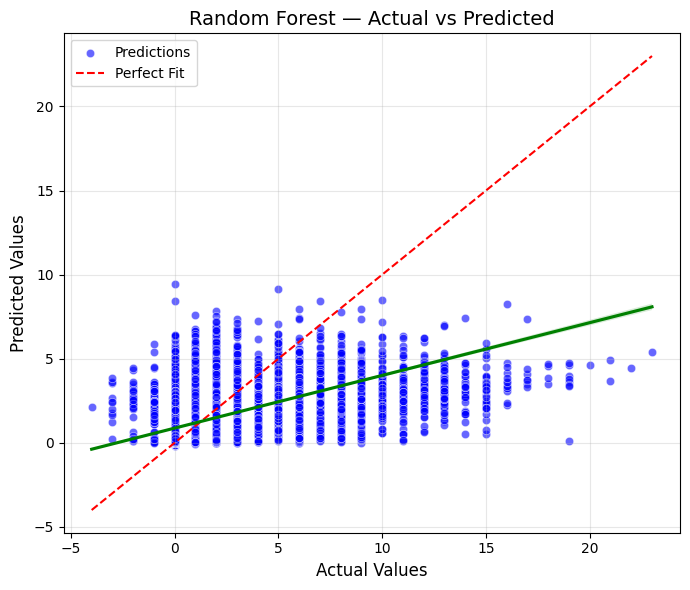

✅ Model trained successfully!
📊 Evaluation Metrics:
Mean Absolute Error (MAE):      1.0772
Mean Squared Error (MSE):       3.9709
Root Mean Squared Error (RMSE): 1.9927
Mean Absolute Percentage Error (MAPE): 78.15%
R-squared (R²):                 0.2863

💡 Interpretation:
   - On average, predictions are off by 1.08 points
   - Model explains 28.63% of variance in upcoming points


In [61]:
# Model 2: Random Forest Regressor
print("🚀 Training Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of trees
    min_samples_split=20,  # Minimum samples to split a node
    random_state=42,       # For reproducibility
    n_jobs=-1,             # Use all CPU cores
    verbose=1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

print(f"\n💡 Interpretation:")
print(f"   - On average, predictions are off by {rf_results['MAE']:.2f} points")
print(f"   - Model explains {rf_results['R2']*100:.2f}% of variance in upcoming points")

🚀 Training XGBoost...
📊 XGBoost - Evaluation Metrics


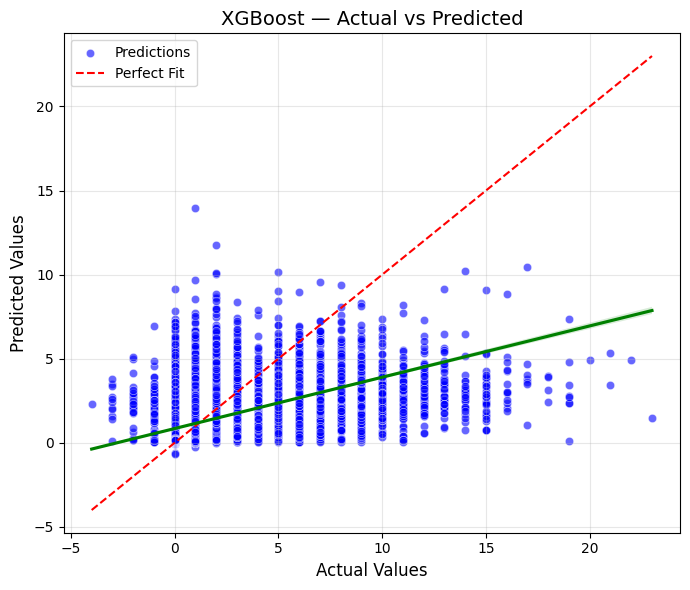

✅ Model trained successfully!
📊 Evaluation Metrics:
Mean Absolute Error (MAE):      1.0744
Mean Squared Error (MSE):       4.0918
Root Mean Squared Error (RMSE): 2.0228
Mean Absolute Percentage Error (MAPE): 77.10%
R-squared (R²):                 0.2646

💡 Interpretation:
   - On average, predictions are off by 1.07 points
   - Model explains 26.46% of variance in upcoming points


In [62]:
# Model 3: XGBoost (if available)
if xgb_available:
    print("🚀 Training XGBoost...")
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        verbosity=1
    )
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Evaluate
    xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")
    
    print(f"\n💡 Interpretation:")
    print(f"   - On average, predictions are off by {xgb_results['MAE']:.2f} points")
    print(f"   - Model explains {xgb_results['R2']*100:.2f}% of variance in upcoming points")
else:
    print("⚠️  Skipping XGBoost (not installed)")
    xgb_results = None

In [63]:
sample_row = {
    'minutes': 90,
    'goals_scored': 1,
    'assists': 0,
    'clean_sheets': 1,
    'goals_conceded': 0,
    'saves': 0,
    'bonus': 3,
    'bps': 30,
    'yellow_cards': 0,
    'red_cards': 0,
    'own_goals': 0,
    'penalties_missed': 0,
    'penalties_saved': 0,
    'was_home': True,
    'GW': 10,
    'position': 'FWD',
    'ict_index': 7.4,
    'value': 9.5,
    'team_h_score': 2,
    'team_a_score': 0,
    'form':.232
}

# Predict using any model
for i in range(2):
    print(predict_single(sample_row))
    sample_row = pd.DataFrame([sample_row]).iloc[0]


the predicted value for the given row is: 1.3452872761297432
the predicted value for the given row is: 1.3452872761297432


### Approach 2: Neural Network (Shallow FFNN)

In [64]:
# Normalize features for Neural Network (important for convergence)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features normalized (mean=0, std=1)")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

✅ Features normalized (mean=0, std=1)
Training set shape: (67659, 22)
Test set shape: (25728, 22)


In [65]:
# # Plot training history
# plt.figure(figsize=(14, 5))

# # Plot loss
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
# plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
# plt.title('Model Loss During Training', fontsize=14, fontweight='bold')
# plt.xlabel('Epoch')
# plt.ylabel('Loss (MSE)')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot MAE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
# plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
# plt.title('Model MAE During Training', fontsize=14, fontweight='bold')
# plt.xlabel('Epoch')
# plt.ylabel('MAE')
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# print(f"\n📊 Training completed in {len(history.history['loss'])} epochs")

In [66]:
# Evaluate Neural Network on test set
# print("📊 Evaluating Neural Network on test set...")

# y_pred_nn = ffnn_model.predict(X_test_scaled, verbose=0).flatten()

# # Evaluate
# nn_results = evaluate_model(y_test, y_pred_nn, "Neural Network (FFNN)")

# print(f"\n💡 Interpretation:")
# print(f"   - On average, predictions are off by {nn_results['MAE']:.2f} points")
# print(f"   - Model explains {nn_results['R2']*100:.2f}% of variance in upcoming points")

### Model Comparison and Results

In [67]:
# Compare all models
# results_comparison = pd.DataFrame({
#     'Model': ['Linear Regression', 'Random Forest', 'XGBoost' if xgb_available else 'XGBoost (N/A)', 'Neural Network'],
#     'MAE': [lr_results['MAE'], rf_results['MAE'], xgb_results['MAE'] if xgb_results else np.nan, nn_results['MAE']],
#     'MSE': [lr_results['MSE'], rf_results['MSE'], xgb_results['MSE'] if xgb_results else np.nan, nn_results['MSE']],
#     'RMSE': [lr_results['RMSE'], rf_results['RMSE'], xgb_results['RMSE'] if xgb_results else np.nan, nn_results['RMSE']],
#     'R²': [lr_results['R2'], rf_results['R2'], xgb_results['R2'] if xgb_results else np.nan, nn_results['R2']]
# })

# # Drop XGBoost row if not available
# if not xgb_available or xgb_results is None:
#     results_comparison = results_comparison[results_comparison['Model'] != 'XGBoost (N/A)']

# print("\n" + "="*80)
# print("🏆 MODEL COMPARISON - ALL METRICS")
# print("="*80)
# print(results_comparison.to_string(index=False))
# print("="*80)

# # Find best model for each metric
# print("\n🥇 Best Models by Metric:")
# print(f"   Lowest MAE:   {results_comparison.loc[results_comparison['MAE'].idxmin(), 'Model']} ({results_comparison['MAE'].min():.4f})")
# print(f"   Lowest RMSE:  {results_comparison.loc[results_comparison['RMSE'].idxmin(), 'Model']} ({results_comparison['RMSE'].min():.4f})")
# print(f"   Highest R²:   {results_comparison.loc[results_comparison['R²'].idxmax(), 'Model']} ({results_comparison['R²'].max():.4f})")

### Approach 3: Seperated Neural Networks (Shallow FFNN)

In [68]:
train_df = df.copy()

In [69]:
train_df = train_df.sort_values(by=['name', 'season_x', 'GW']).reset_index(drop=True)

# Shift total_points by -1 to get next week's points
train_df['upcoming_total_points'] = (
    train_df.groupby(['name', 'season_x'])['total_points'].shift(-1)
)

In [70]:
dummies = pd.get_dummies(train_df['position'], prefix='position', drop_first=True)
train_df = pd.concat([train_df, dummies], axis=1)


In [71]:
df_GK = train_df[train_df['position'] == 'GK'].copy()
df_Player = train_df[train_df['position'] != 'GK'].copy()

df_baseline = train_df.copy()


In [72]:
train_df.position.unique()

array(['FWD', 'DEF', 'MID', 'GK'], dtype=object)

<Axes: >

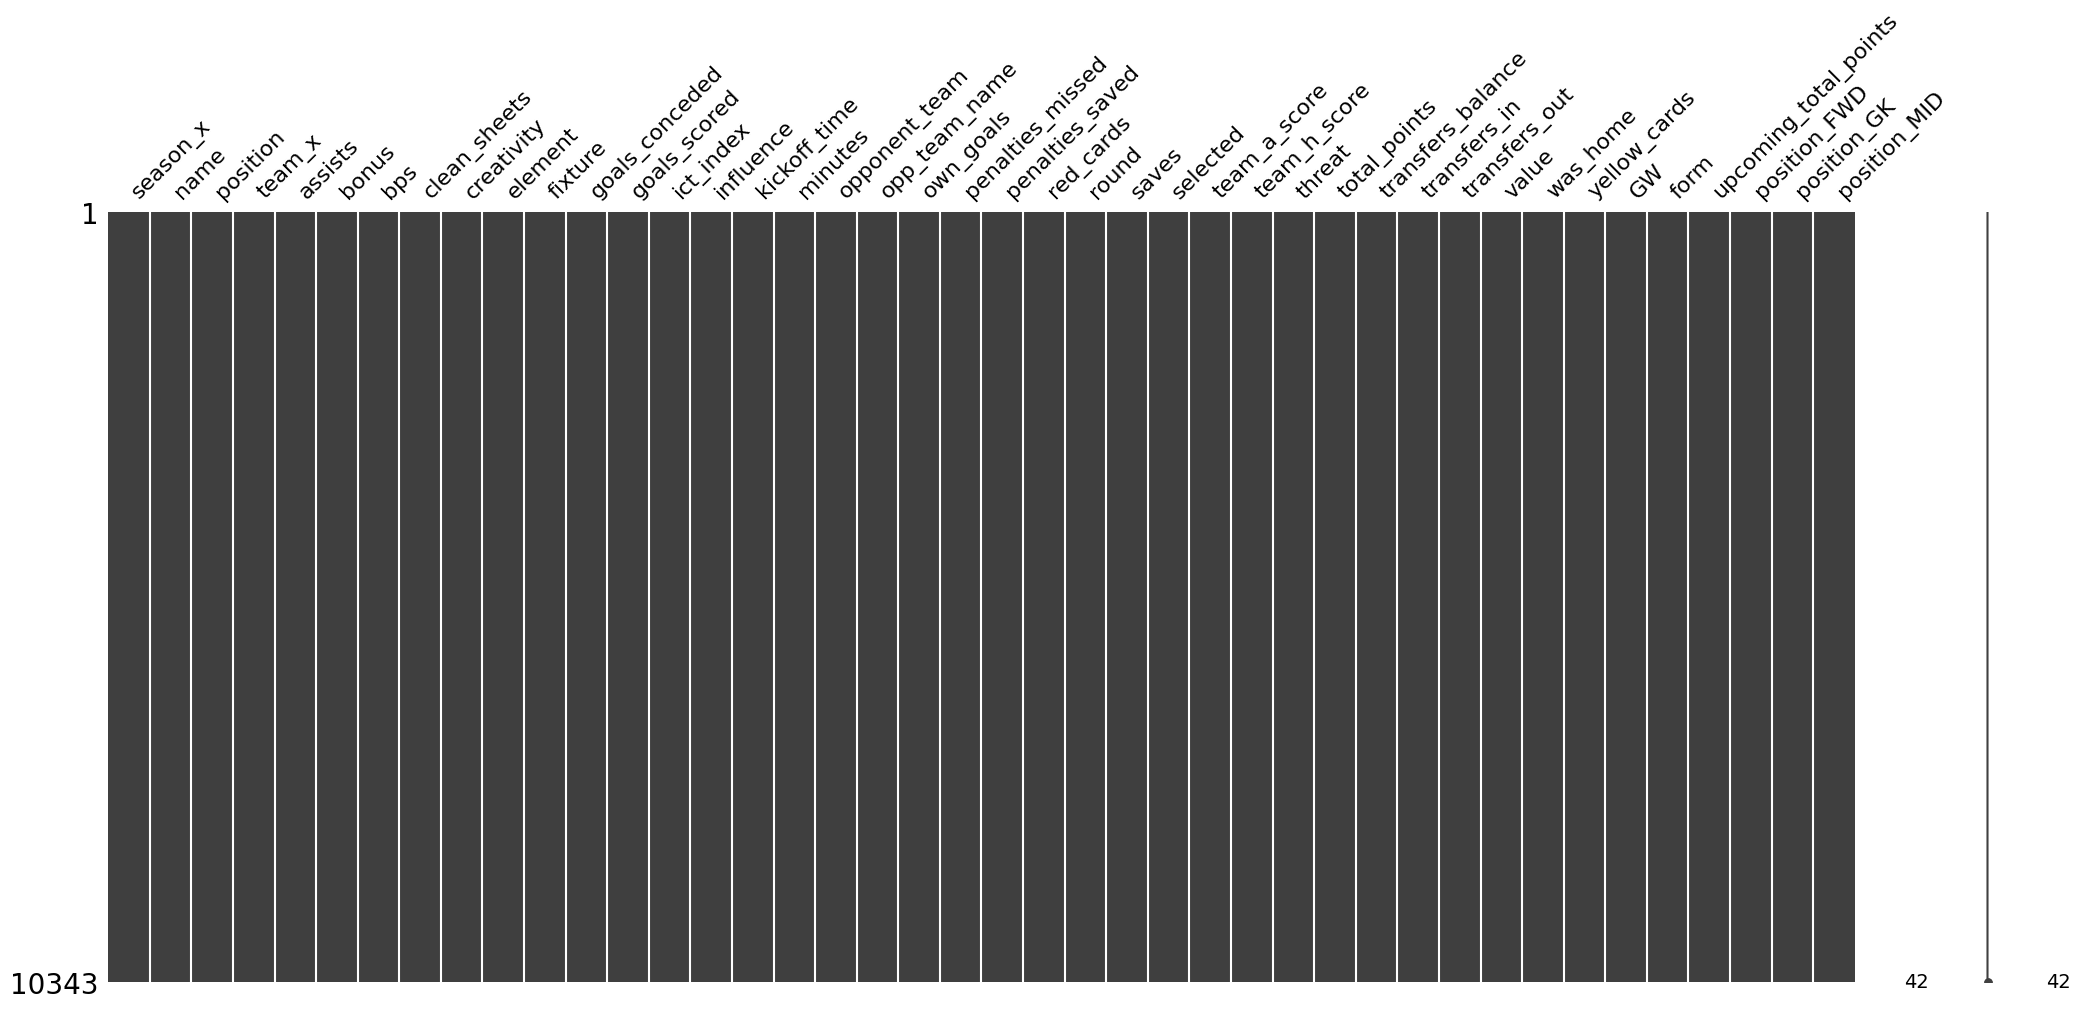

In [73]:
df_Player = df_Player.dropna(subset=["upcoming_total_points"]).reset_index(drop=True)
df_GK = df_GK.dropna(subset=["upcoming_total_points"]).reset_index(drop=True)
df_baseline = df_baseline.dropna(subset=["upcoming_total_points"]).reset_index(drop=True)
msno.matrix(df_GK)

In [74]:
features_player = ['form', 'creativity', 'influence', 'threat', 'ict_index', 'goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals',"bps","bonus",'goals_conceded',"minutes", "value",'position_FWD', 'position_GK', 'position_MID']
features_gk = ['form','goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals',"bps","bonus","goals_conceded", "minutes", "value", 'saves', 'penalties_saved']
features_overall = ['form', 'creativity', 'influence', 'threat', 'ict_index', 'goals_scored','assists', 'clean_sheets', 'yellow_cards', 'red_cards', 'penalties_missed', 'own_goals', "value","bps","bonus","goals_conceded", "minutes", 'saves', 'penalties_saved','position_FWD', 'position_GK', 'position_MID']

In [75]:
# Feature and target 

# in case seperate models for players and goal keepers
X_Player = df_Player[features_player]
y_Player = df_Player['upcoming_total_points'] 

X_GK = df_GK[features_gk]
y_GK = df_GK['upcoming_total_points'] 

# for single model
X_overAll = df_baseline[features_overall]
y_overAll = df_baseline['upcoming_total_points'] 

**The following cell needs revision**

In [76]:
# Scale the features 
scaler_player = StandardScaler() 
scaler_gk = StandardScaler() 
scaler_overall = StandardScaler() 

X_Player_scaled = scaler_player.fit_transform(X_Player)

X_GK_scaled = scaler_gk.fit_transform(X_GK)

X_overAll_scaled = scaler_overall.fit_transform(X_overAll)

In [77]:
# Split the dataset into train and test sets: for player
X_Player_train, X_Player_test, y_Player_train, y_Player_test = train_test_split(X_Player_scaled, y_Player, 
test_size=0.2, random_state=42) 

In [78]:
# Split the dataset into train and test sets: for Goal keeper
X_GK_train, X_GK_test, y_GK_train, y_GK_test = train_test_split(X_GK_scaled, y_GK, 
test_size=0.2, random_state=42) 

In [79]:
# Split the dataset into train and test sets: for single model
X_overAll_train, X_overAll_test, y_overAll_train, y_overAll_test = train_test_split(X_overAll_scaled, y_overAll, 
test_size=0.2, random_state=42) 

In [80]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_Player_train.shape, "Train Label shape", y_Player_train.shape) 
print("Test data shape:",X_Player_test.shape, "Test Label shape", y_Player_test.shape) 

Train data shape: (66435, 20) Train Label shape (66435,)
Test data shape: (16609, 20) Test Label shape (16609,)


In [81]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_GK_train.shape, "Train Label shape", y_GK_train.shape) 
print("Test data shape:",X_GK_test.shape, "Test Label shape", y_GK_test.shape) 

Train data shape: (8274, 15) Train Label shape (8274,)
Test data shape: (2069, 15) Test Label shape (2069,)


In [82]:
#Explore the size and dimension of the train and test data after splitting: 
print("Train data shape:",X_overAll_train.shape, "Train Label shape", y_overAll_train.shape) 
print("Test data shape:",X_overAll_test.shape, "Test Label shape", y_overAll_test.shape) 

Train data shape: (74709, 22) Train Label shape (74709,)
Test data shape: (18678, 22) Test Label shape (18678,)


In [83]:
model_Player = Sequential([ 
Input(shape=(X_Player_train.shape[1],)),
layers.Dense(16, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'), 
layers.Dense(1, activation='linear')
]) 
model_Player.summary()

I0000 00:00:1761334649.281833      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761334649.282618      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,057 (11.94 KB)

 Trainable params: 3,057 (11.94 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model_GK = Sequential([ 
Input(shape=(X_GK_train.shape[1],)),
layers.Dense(18, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'),  
layers.Dense(1, activation='linear')  
]) 
model_GK.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 18)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model_overAll = Sequential([ 
Input(shape=(X_overAll_train.shape[1],)),
layers.Dense(18, activation='relu'), 
layers.Dense(32, activation='relu'),
layers.Dense(64, activation='relu'),  
layers.Dense(1, activation='linear')  
]) 
model_overAll.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 18)             │           414 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,199 (12.50 KB)

 Trainable params: 3,199 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model_Player.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [87]:
model_GK.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [88]:
model_overAll.compile(optimizer='adam', 
loss='mse', 
metrics=['mae', 'mse']) 

In [89]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss',mode='min', patience=3, 
restore_best_weights=True) 
history_Player = model_Player.fit(X_Player_train, y_Player_train, 
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50


I0000 00:00:1761334653.296875      88 service.cc:148] XLA service 0x7816e000f590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761334653.297534      88 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761334653.297552      88 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761334653.538100      88 cuda_dnn.cc:529] Loaded cuDNN version 90300


  69/1661 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.9218 - mae: 1.4083 - mse: 6.9218

I0000 00:00:1761334654.392568      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1661/1661 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.2323 - mae: 1.2935 - mse: 5.2323 - val_loss: 4.8550 - val_mae: 1.2266 - val_mse: 4.8550
Epoch 2/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.8540 - mae: 1.2614 - mse: 4.8540 - val_loss: 4.8542 - val_mae: 1.2705 - val_mse: 4.8542
Epoch 3/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.9062 - mae: 1.2668 - mse: 4.9062 - val_loss: 4.7902 - val_mae: 1.2325 - val_mse: 4.7902
Epoch 4/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.8468 - mae: 1.2554 - mse: 4.8468 - val_loss: 4.8229 - val_mae: 1.2499 - val_mse: 4.8229
Epoch 5/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.8314 - mae: 1.2504 - mse: 4.8314 - val_loss: 4.8327 - val_mae: 1.3407 - val_mse: 4.8327
Epoch 6/50
1661/1661 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.7871 - mae: 1.2471 - mse: 4.7871 - val_loss: 4.9691 - val_mae: 1.2462 - val_mse: 4.9691


In [90]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss',mode='min', patience=3, 
restore_best_weights=True) 
history_GK = model_GK.fit(X_GK_train, y_GK_train, 
batch_size=128,
epochs=50, 
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 6.2358 - mae: 1.2356 - mse: 6.2358 - val_loss: 3.6718 - val_mae: 1.1110 - val_mse: 3.6718
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1373 - mae: 1.0061 - mse: 3.1373 - val_loss: 3.4771 - val_mae: 0.9210 - val_mse: 3.4771
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1353 - mae: 0.9054 - mse: 3.1353 - val_loss: 3.4903 - val_mae: 0.9010 - val_mse: 3.4903
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5569 - mae: 0.9548 - mse: 3.5569 - val_loss: 3.4954 - val_mae: 0.9084 - val_mse: 3.4954
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1716 - mae: 0.8838 - mse: 3.1716 - val_loss: 3.5002 - val_mae: 0.9750 - val_mse: 3.5002


In [91]:
from tensorflow.keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss',mode='min', patience=3, 
restore_best_weights=True) 
history_overAll = model_overAll.fit(X_overAll_train, y_overAll_train, 
epochs=50, 
batch_size=128,
validation_split=0.2, 
verbose=1, 
callbacks=[early_stop]) 

Epoch 1/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 5.4226 - mae: 1.2973 - mse: 5.4226 - val_loss: 4.7812 - val_mae: 1.1770 - val_mse: 4.7812
Epoch 2/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7227 - mae: 1.2215 - mse: 4.7227 - val_loss: 4.7224 - val_mae: 1.2273 - val_mse: 4.7224
Epoch 3/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6212 - mae: 1.2268 - mse: 4.6212 - val_loss: 4.7267 - val_mae: 1.2029 - val_mse: 4.7267
Epoch 4/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.7156 - mae: 1.2226 - mse: 4.7156 - val_loss: 4.7220 - val_mae: 1.2112 - val_mse: 4.7220
Epoch 5/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6168 - mae: 1.2157 - mse: 4.6168 - val_loss: 4.7145 - val_mae: 1.2122 - val_mse: 4.7145
Epoch 6/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6043 - mae: 1.2042 - mse: 4.6043 - val_loss: 4.7151 - val_mae: 1.2250 - val_mse: 4.7151
Epoch 7/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.6546 - mae: 1.2168 - mse: 4.6546 - val

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_Player.predict(X_Player_test)
mae = mean_absolute_error(y_Player_test, y_pred)
mse = mean_squared_error(y_Player_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_Player_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_Player_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

520/520 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 1.23, MSE: 4.78, RMSE: 2.19, R²: 0.27
MAPE: 77.02%


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_GK.predict(X_GK_test)
mae = mean_absolute_error(y_GK_test, y_pred)
mse = mean_squared_error(y_GK_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_GK_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_GK_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
MAE: 0.85, MSE: 2.89, RMSE: 1.70, R²: 0.43
MAPE: 78.92%


In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_overAll.predict(X_overAll_test)
mae = mean_absolute_error(y_overAll_test, y_pred)
mse = mean_squared_error(y_overAll_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_overAll_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Convert Series to NumPy array, then flatten both
y_test = y_overAll_test.to_numpy().flatten()
y_pred_flat = np.array(y_pred).flatten()

# Calculate MAPE safely
mape = np.nanmean(np.abs((y_test - y_pred_flat) / np.where(y_test == 0, np.nan, y_test))) * 100

print(f"MAPE: {mape:.2f}%")

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 1.21, MSE: 4.59, RMSE: 2.14, R²: 0.29
MAPE: 74.95%


In [95]:
predict_single(sample_row)

'the predicted value for the given row is: 1.3452872761297432'

In [96]:
sample_row['position'] = 'GK'
predict_single(sample_row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


/tmp/ipykernel_19/3881916307.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return "the predicted value for the given row is: " + str(float(prediction[0]))


'the predicted value for the given row is: 19.501827239990234'

In [97]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [98]:
explainer = shap.LinearExplainer(lr_model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


# **summary plot (beeswarm)**
**the higher values of each features is represented in red colors while lower values rep. in blue colors**

**the values in the +ve direction contribute positively for the prediction to be higher(model output)**

**while the -ve direction contribute negatively in the prediction to be lower**

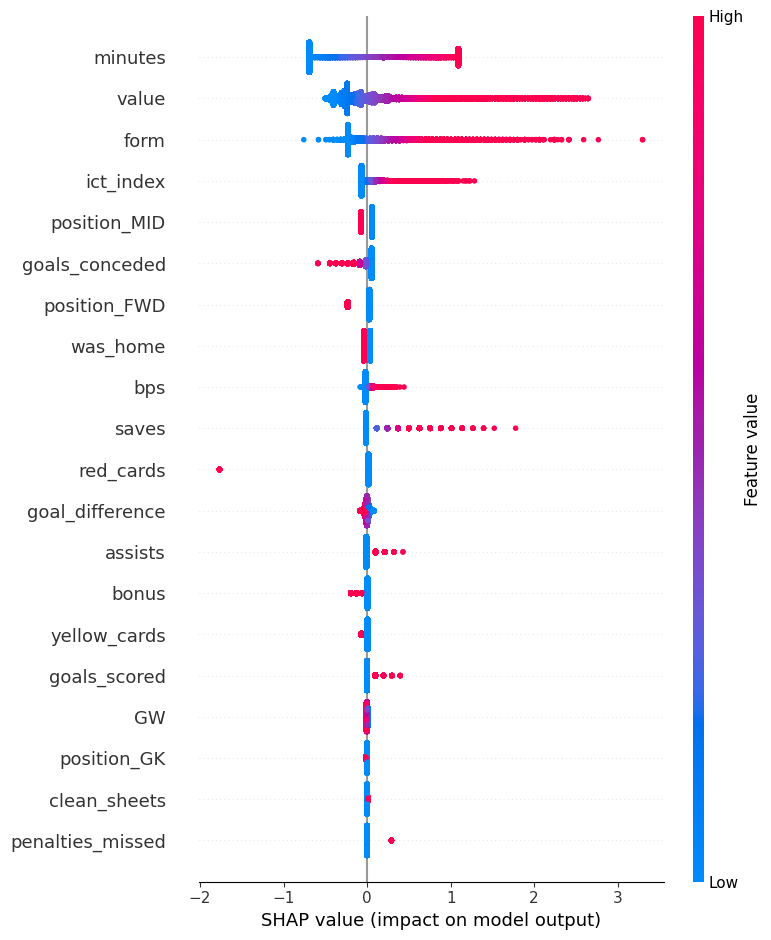

In [99]:
shap.summary_plot(shap_values, X_train)

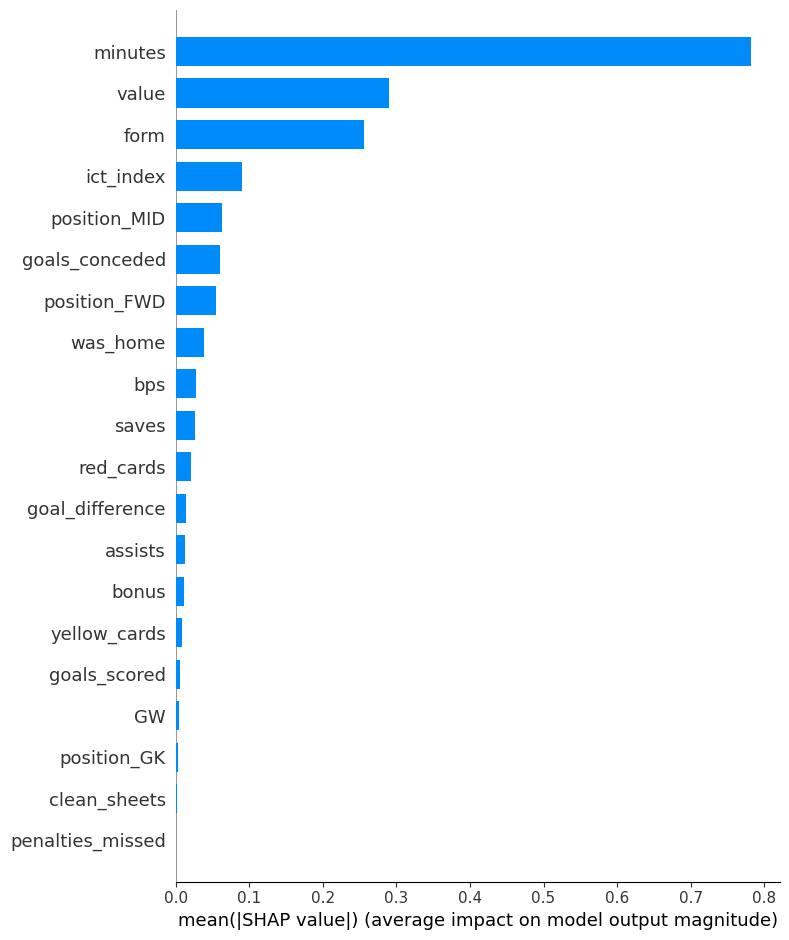

In [100]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

# **local scope (individual prediction)**

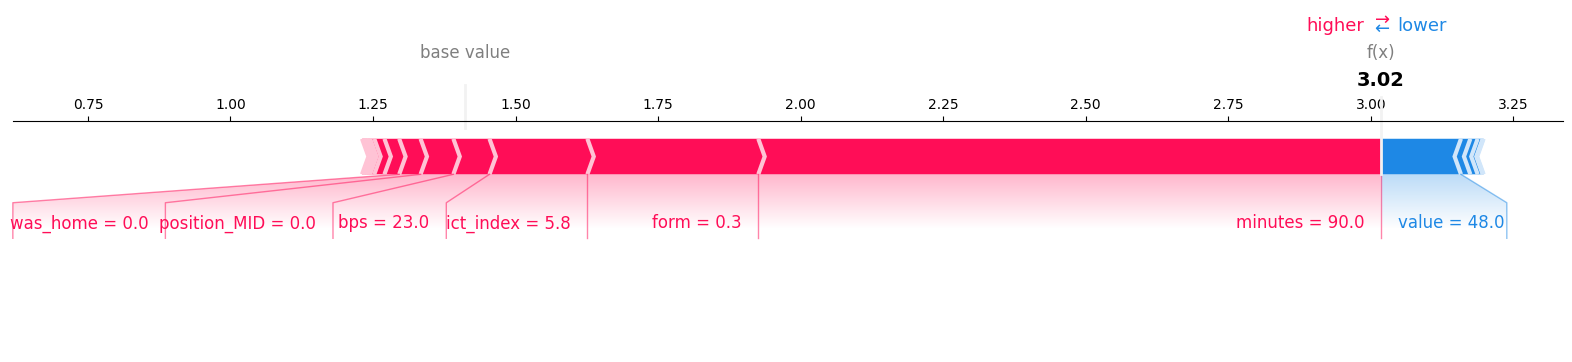

In [101]:
# Pick one example
i = 10  # index of a test sample
sample = X_test.iloc[i]

# Compute SHAP values for that instance
shap_value_single = explainer.shap_values(sample)

# Force plot visualization
shap.force_plot(
    explainer.expected_value, 
    shap_value_single, 
    sample,
    matplotlib=True
)

# **the following are plots(global and local) for the three neural network models done**

# **starting with field players model**

In [102]:
# --- Small background & test samples
background_Player = shap.sample(X_Player_train, 100, random_state=42)
test_Player = shap.sample(X_Player_test, 300, random_state=42)

# --- Create SHAP explainer
explainer_Player = shap.Explainer(model_Player, background_Player, algorithm="auto")
# --- Compute SHAP values
shap_values_Player = explainer_Player.shap_values(test_Player)

# --- Handle base value manually if permutation explainer is used
base_value_Player = getattr(explainer_Player, "expected_value", np.mean(model_Player.predict(background_Player)))

# --- Fix: unwrap shap_values if it’s a list
# if isinstance(shap_values_Player, list):
#     shap_values_Player = shap_values_Player[0]

PermutationExplainer explainer: 301it [00:14,  8.38it/s]

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


✅ Global SHAP (Player model)


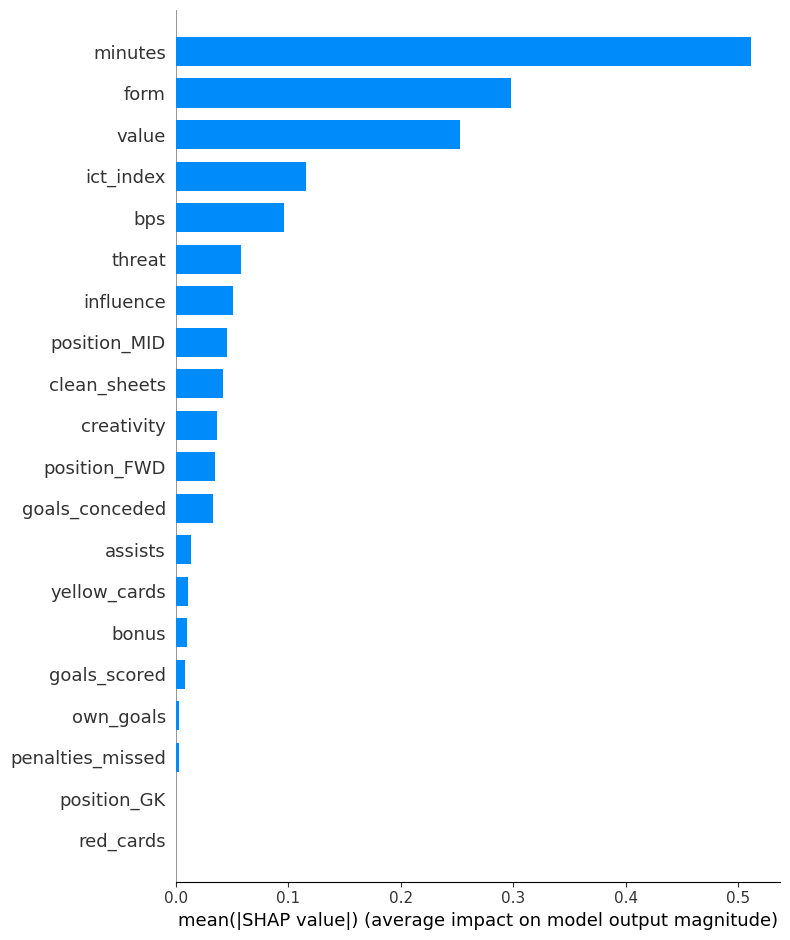

In [103]:
# --- Global plots
print("✅ Global SHAP (Player model)")
shap.summary_plot(shap_values_Player, test_Player, feature_names=X_Player.columns, plot_type='bar')

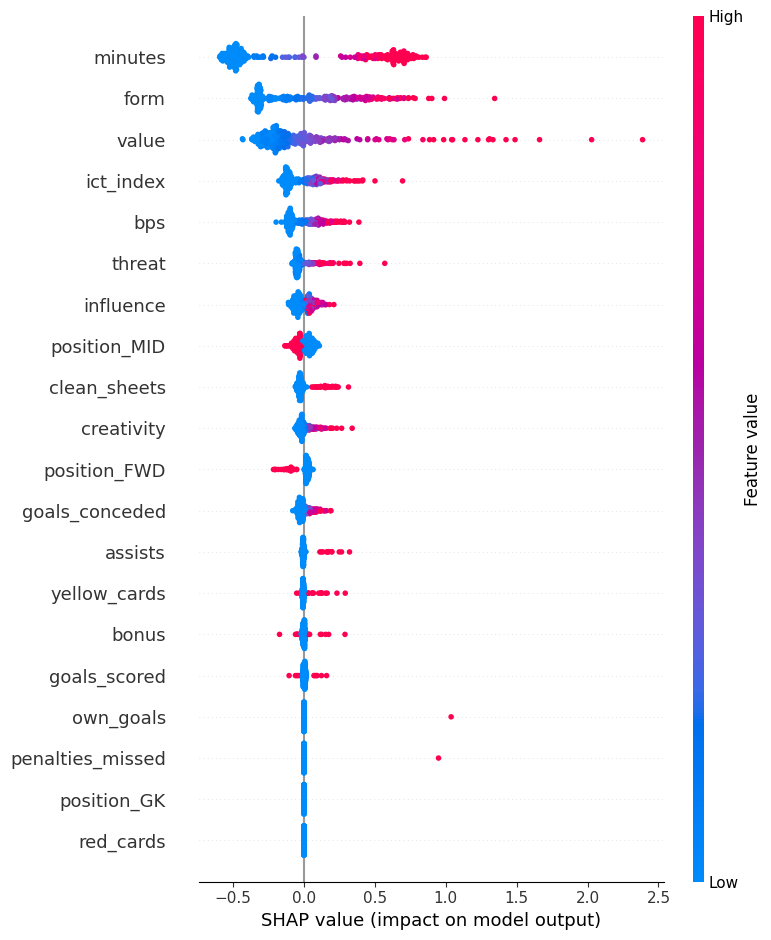

In [104]:
# this cell was intended to do the beeswarm plot but it is not working for some reason I don't get
subset_size = shap_values_Player.shape[0]

shap.summary_plot(shap_values_Player, test_Player, feature_names=X_Player.columns,plot_type='dot')

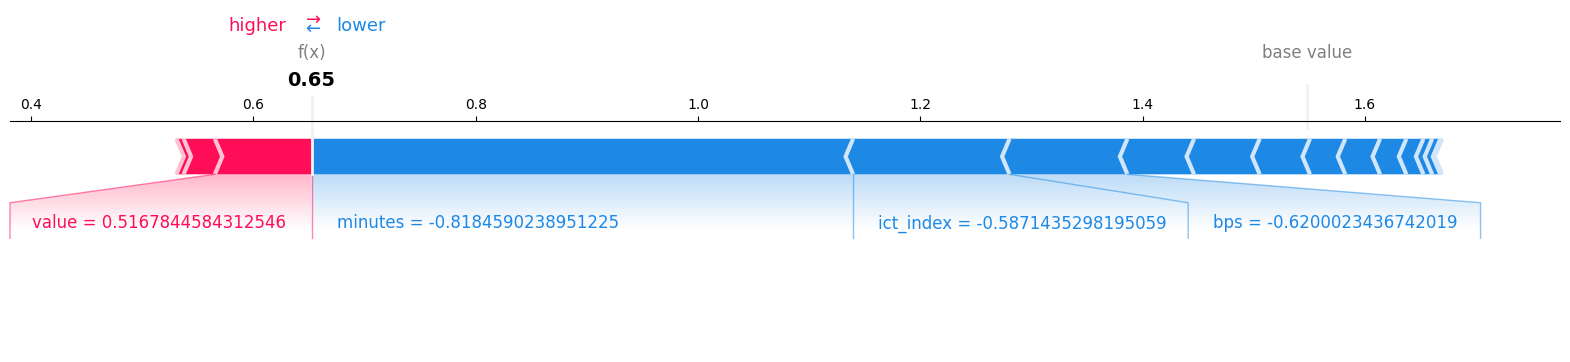

In [105]:
# --- Local force plot (example: one test instance)
i = 3
shap.initjs()
shap.plots.force(
    base_value_Player,
    shap_values_Player[i],
    features=test_Player[i],
    feature_names=X_Player.columns,
    matplotlib=True
)

# **Plots for the GK model**

In [106]:
# --- Small background & test samples
background_GK = shap.sample(X_GK_train, 100, random_state=42)
test_GK = shap.sample(X_GK_test, 300, random_state=42)

# --- Create SHAP explainer
explainer_GK = shap.Explainer(model_GK, background_GK, algorithm="auto")

# --- Compute SHAP values
shap_values_GK = explainer_GK.shap_values(test_GK)

# --- Handle base value manually
base_value_GK = getattr(explainer_GK, "expected_value", np.mean(model_GK.predict(background_GK)))


PermutationExplainer explainer: 301it [00:12,  5.14it/s]                         


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


✅ Global SHAP (Goalkeeper model)


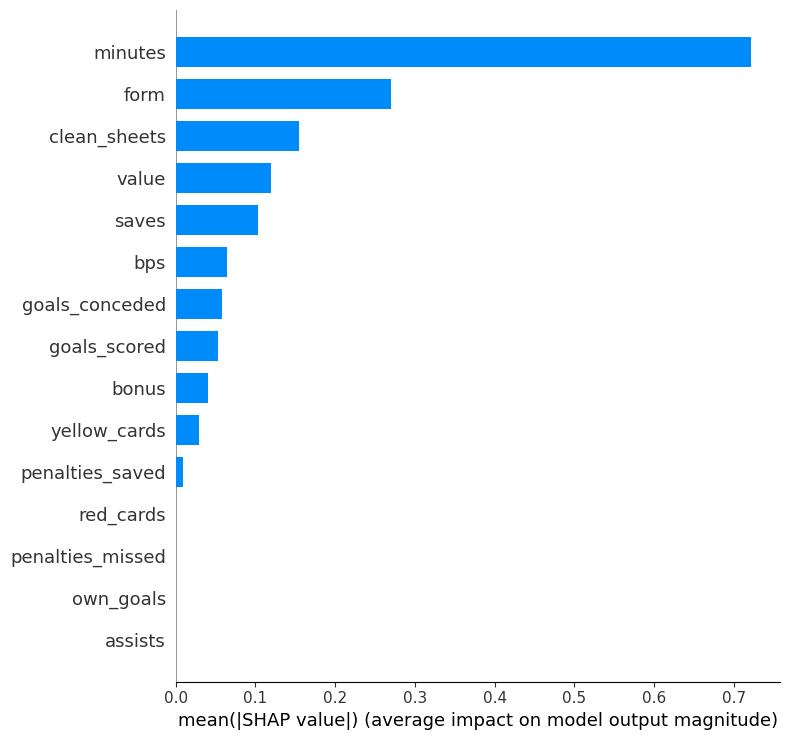

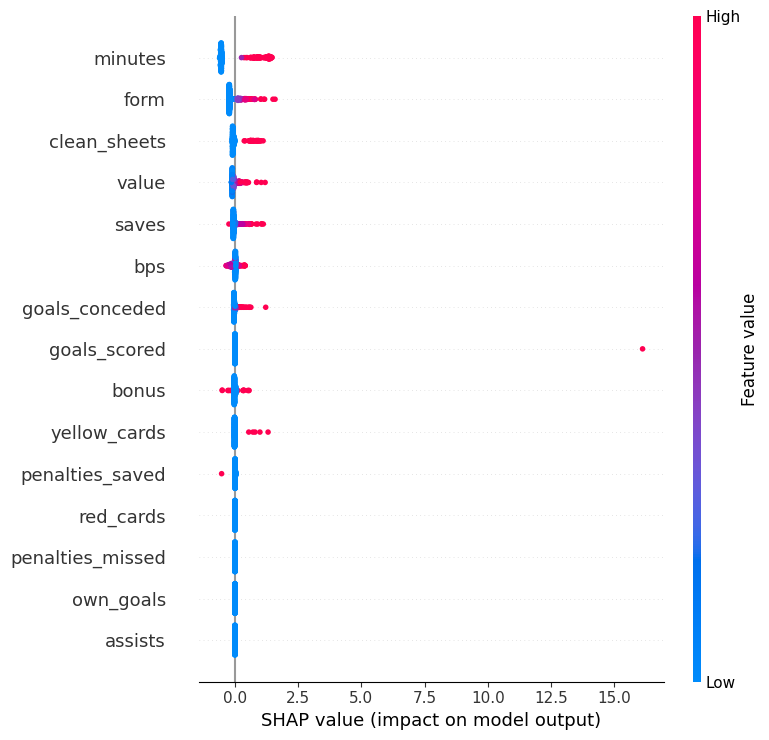

In [107]:
# --- Global plots
print("✅ Global SHAP (Goalkeeper model)")
shap.summary_plot(shap_values_GK, test_GK, feature_names=X_GK.columns, plot_type='bar')
shap.summary_plot(shap_values_GK, test_GK, feature_names=X_GK.columns, plot_type='dot')


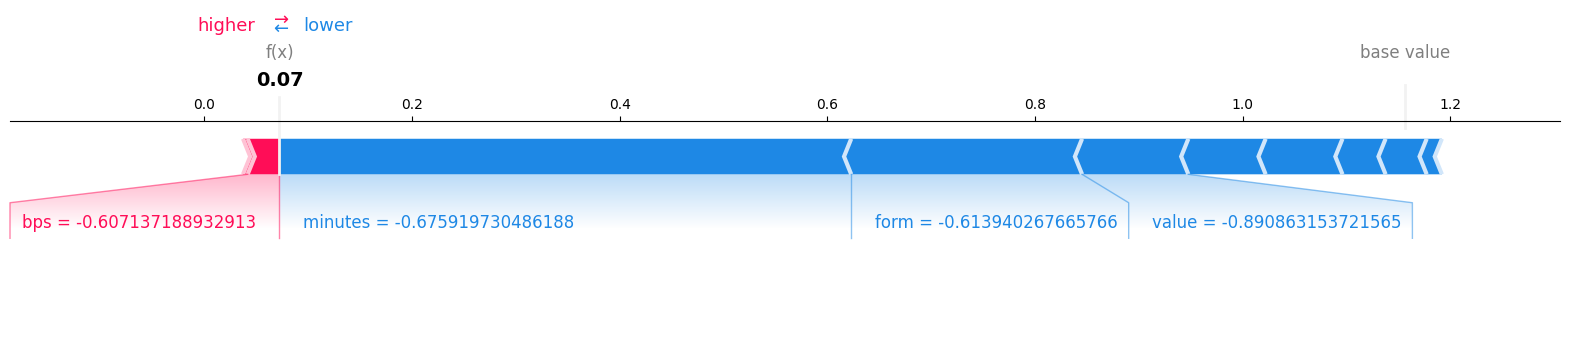

In [108]:
# --- Local force plot (example: one test instance)
i = 5
shap.initjs()
shap.plots.force(
    base_value_GK,
    shap_values_GK[i],
    features=test_GK[i],
    feature_names=X_GK.columns,
    matplotlib=True
)

# **plots for the overall model**

In [109]:
# --- Small background & test samples
background_overAll = shap.sample(X_overAll_train, 100, random_state=42)
test_overAll = shap.sample(X_overAll_test, 300, random_state=42)

# --- Create SHAP explainer
explainer_overAll = shap.Explainer(model_overAll, background_overAll, algorithm="auto")

# --- Compute SHAP values
shap_values_overAll = explainer_overAll.shap_values(test_overAll)

# --- Handle base value manually
base_value_overAll = getattr(explainer_overAll, "expected_value", np.mean(model_overAll.predict(background_overAll)))



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


✅ Global SHAP (Overall model)


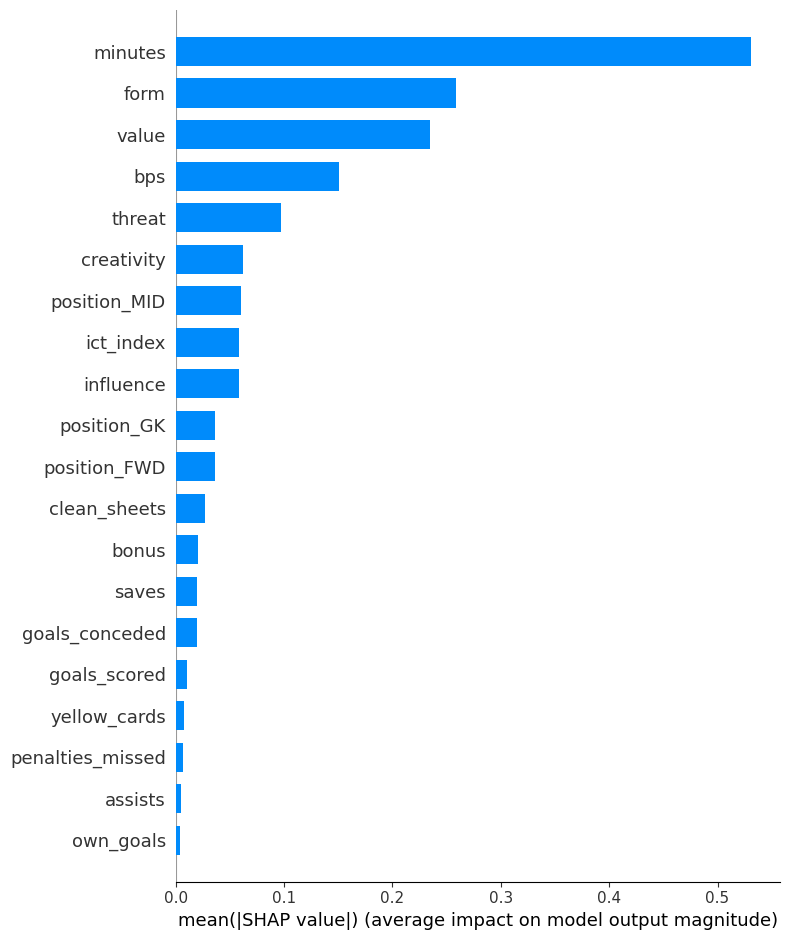

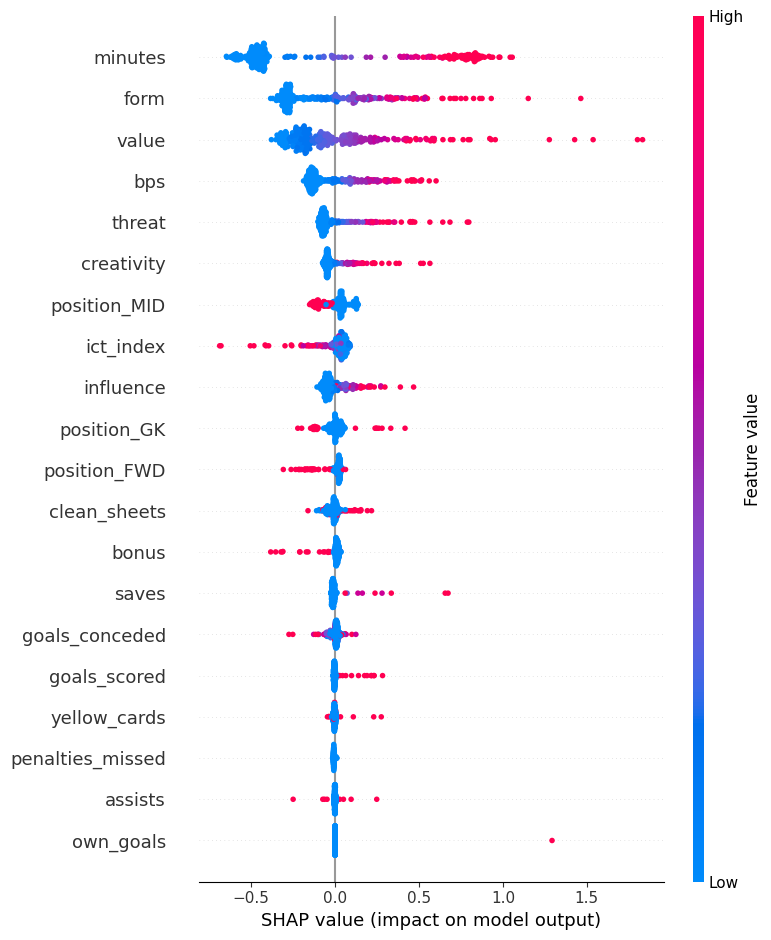

In [110]:
# --- Global plots
print("✅ Global SHAP (Overall model)")
shap.summary_plot(shap_values_overAll, test_overAll, feature_names=X_overAll.columns, plot_type='bar')
shap.summary_plot(shap_values_overAll, test_overAll, feature_names=X_overAll.columns, plot_type='dot')



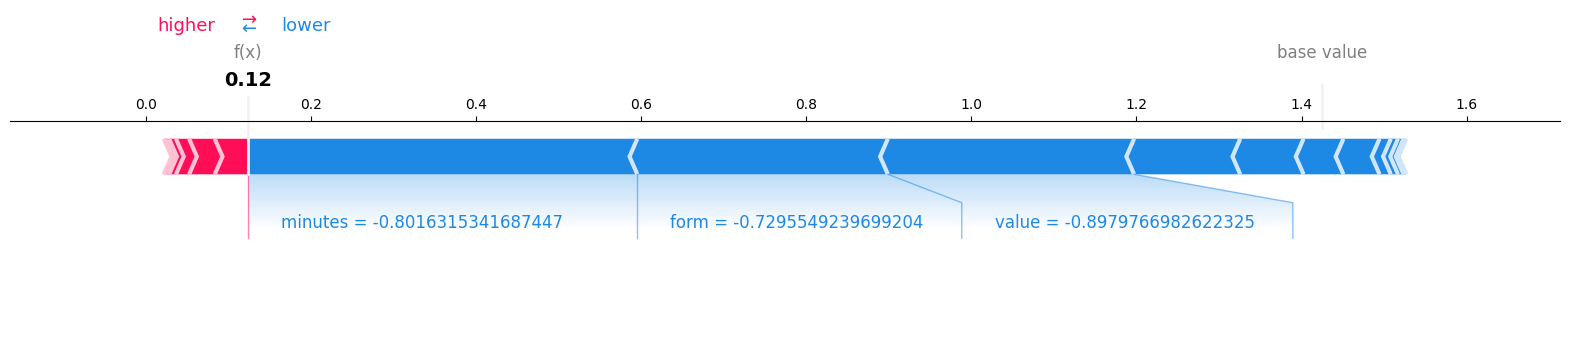

In [111]:
# --- Local force plot (example: one test instance)
i = 2
shap.initjs()
shap.plots.force(
    base_value_overAll,
    shap_values_overAll[i],
    features=test_overAll[i],
    feature_names=X_overAll.columns,
    matplotlib=True
)

# **Lime for player model**

In [112]:
import lime
import lime.lime_tabular

# Define a prediction function for LIME
def player_predict_fn(input_data):
    return model_Player.predict(input_data).flatten()

In [113]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_Player_train,
    feature_names=features_player,
    mode='regression',
    verbose=True,
    # training_labels=y_Player_train.to_numpy(),
    feature_selection='auto'
)

In [114]:
# Choose an index to explain
idx = 500
sample = X_Player_test[idx]
print(sample)
# Generate explanation
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=player_predict_fn,
    num_features=10
)

# Display explanation
exp.show_in_notebook()

[-0.74461587 -0.47929373 -0.56368077 -0.42736827 -0.58714353 -0.20671134
 -0.20176479 -0.35126222 -0.24932119 -0.04393642 -0.03401987 -0.0406546
 -0.62000234 -0.22239758 -0.51698858 -0.81845902 -0.70763129 -0.41695293
  0.         -0.91877734]
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Intercept 3.612766519895022
Prediction_local [1.19674396]
Right: 0.10533129


In [115]:
print(exp.as_list())

[('own_goals <= -0.04', -1.305233603375747), ('red_cards <= -0.04', 1.2247241791503156), ('penalties_missed <= -0.03', -1.020989478112837), ('value <= -0.55', -0.5208342028474299), ('form <= -0.74', -0.37864169751110766), ('minutes <= -0.82', -0.2816156489967519), ('goals_scored <= -0.21', 0.22160688322096456), ('bonus <= -0.22', -0.1274604477136899), ('bps <= -0.62', -0.11703134977754223), ('clean_sheets <= -0.35', -0.11054719584380625)]


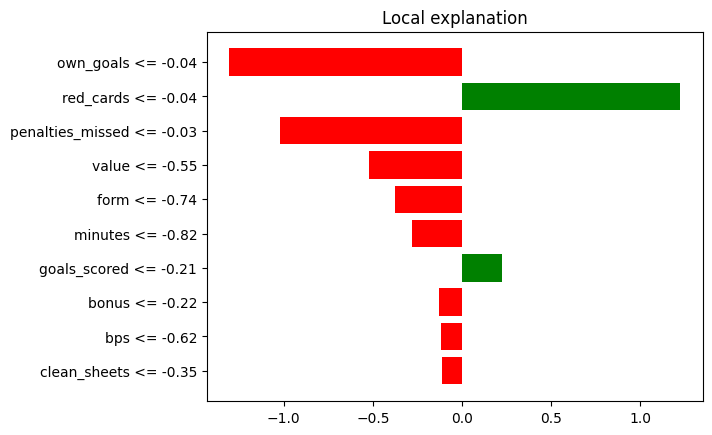

In [116]:
fig = exp.as_pyplot_figure()

# **Lime For goalkeeper Model**

In [117]:
# Define a prediction function for LIME
def gk_predict_fn(input_data):
    return model_GK.predict(input_data).flatten()

In [118]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_GK_train,
    feature_names=features_gk,
    mode='regression',
    verbose=True,
    # training_labels=y_Player_train.to_numpy(),
    feature_selection='auto'
)

In [119]:
# Choose an index to explain
idx = 100
sample = X_GK_test[idx]
print(sample)
# Generate explanation
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=gk_predict_fn,
    num_features=10
)

# Display explanation
exp.show_in_notebook()

[ 1.01803854 -0.00983326 -0.03408156 -0.3154368  -0.11798391 -0.01703336
  0.         -0.03810987  0.64552987 -0.20972503  2.69126459  1.48506873
  1.32612301  0.61405788 -0.08013805]
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Intercept 5.433120233177387
Prediction_local [3.59346093]
Right: 3.3413844


In [120]:
print(exp.as_list())

[('assists <= -0.03', -2.4482964658458637), ('own_goals <= -0.04', -1.4021629890002572), ('-0.68 < minutes <= 1.49', 1.2714474286183808), ('yellow_cards <= -0.12', -1.1784737384231199), ('form > 0.47', 0.6592425980265765), ('clean_sheets <= -0.32', -0.647631836520673), ('red_cards <= -0.02', 0.6460719629406922), ('penalties_saved <= -0.08', 0.44147254506286676), ('saves > 0.04', 0.4253371836234058), ('value > 0.52', 0.39333400740492624)]


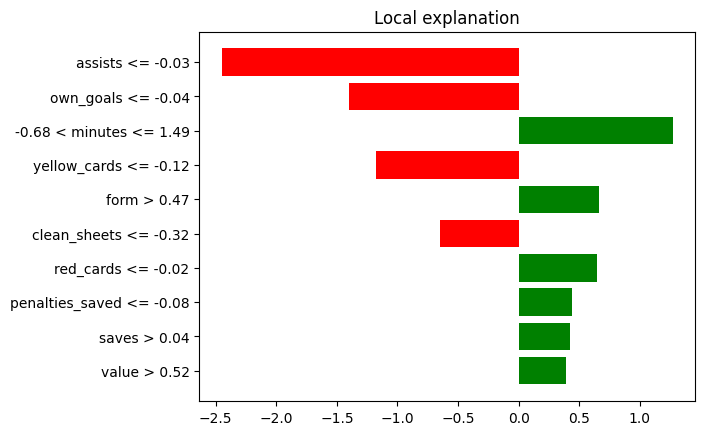

In [121]:
fig = exp.as_pyplot_figure()

# **Lime For OverAll Model**

In [122]:
# Define a prediction function for LIME
def overall_predict_fn(input_data):
    return model_overAll.predict(input_data).flatten()

In [123]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_overAll_train,
    feature_names=features_overall,
    mode='regression',
    verbose=True,
    # training_labels=y_Player_train.to_numpy(),
    feature_selection='auto'
)

In [124]:
# Choose an index to explain
idx = 500
sample = X_overAll_test[idx]
print(sample)
# Generate explanation
exp = explainer.explain_instance(
    data_row=sample,
    predict_fn=overall_predict_fn,
    num_features=10
)

# Display explanation
exp.show_in_notebook()

[ 1.03106528 -0.44719122 -0.56116073 -0.39904628 -0.57006217 -0.19449735
 -0.19019155 -0.34740298 -0.23789349 -0.04181479 -0.03207862 -0.04038025
  0.12782285 -0.61855842 -0.22101992 -0.50917405 -0.80163153 -0.15671928
 -0.02659391 -0.38945439 -0.3529142  -0.82853932]
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Intercept 2.490622288408848
Prediction_local [1.78611823]
Right: 1.3627527


In [125]:
print(exp.as_list())

[('red_cards <= -0.04', 1.2408786947398343), ('own_goals <= -0.04', -1.0881118305514645), ('form > 0.49', 0.5170805476943799), ('minutes <= -0.80', -0.3413078972126847), ('saves <= -0.16', -0.25453122048016996), ('bps <= -0.62', -0.25393411450104797), ('penalties_missed <= -0.03', -0.24398528903610056), ('clean_sheets <= -0.35', -0.24085409348892173), ('threat <= -0.40', -0.22161053949509263), ('penalties_saved <= -0.03', 0.1818716840322739)]


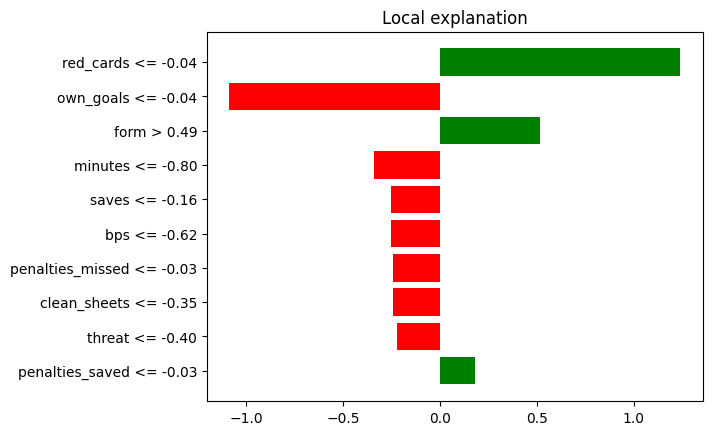

In [126]:
fig = exp.as_pyplot_figure()

In [127]:
# Example: exporting your DataFrame to CSV
df_ml.to_csv("filename.csv", index=False)